# 05 — Baseline Model Evaluation

**Goal:** Establish baseline performance for structured and W2V (radiology) datasets.

**Scope**
- Evaluate pre-optimization models (trained in `04_model_training.ipynb`)
- Generate AUROC, PR-AUC, Accuracy, Precision, Recall, F1, F2 scores
- Plot ROC and Precision-Recall curves for each variant
- Save metrics to `results/evaluation/{variant}/` and reports

This notebook precedes external validation (`06_external_validation.ipynb`)  
and later embedding optimization (`08_w2v_hyperparam_search.ipynb`).


## 0 Imports

In [1]:
import pandas as pd
import glob
import joblib
from src.utils import resolve_path, load_latest_artifact
from src.evaluation import (
    evaluate_all_models,
    evaluate_classifier_extended,
    unwrap_best_estimators_non_smote,
    unwrap_best_estimators_smote,
    plot_roc_curves,
    plot_pr,
    export_summary,
)

from IPython.display import Image, display;

# I convert X_test to np.array and it causues the following warning when evaluating classifiers
import warnings
warnings.filterwarnings(
    "ignore",
    message="X does not have valid feature names",
    category=UserWarning
)

# ensure paths resolve correctly
project_root = resolve_path(".")
print(f"Project root: {project_root}")


Project root: C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis


## 1 Load Models and Data

In [2]:
# ──────────────────────────────────────────────
# Non-SMOTE (original baseline) model artifacts
# ──────────────────────────────────────────────

# --- Locate most recent timestamped model files ---
# ORIGINAL (non-SMOTE) baseline
orig_models_path = load_latest_artifact([
    "results/models/original_baseline/*/original_*_full.pkl",
    # optional fallbacks if names vary:
    # "results/models/original_baseline/*/*original*_full.pkl",
])

models_original = joblib.load(orig_models_path)

# W2V (radiology) baseline
w2v_models_path = load_latest_artifact([
    "results/models/w2v_radiology_baseline/*/w2v_radiology_*_full.pkl",
    # optional fallback:
    # "results/models/w2v_radiology_baseline/*/*w2v*radiology*_full.pkl",
])

models_w2v = joblib.load(w2v_models_path)

print(f"Loading baseline models:\n  Original → {orig_models_path}\n  W2V → {w2v_models_path}")

# --- Load pre-split processed datasets ---
X_train_orig = pd.read_csv(resolve_path("data/processed/original/data_original_xtrain.csv"))
y_train_orig = pd.read_csv(resolve_path("data/processed/original/data_original_ytrain.csv")).squeeze()
X_test_orig  = pd.read_csv(resolve_path("data/processed/original/data_original_xtest.csv"))
y_test_orig  = pd.read_csv(resolve_path("data/processed/original/data_original_ytest.csv")).squeeze()

X_train_w2v = pd.read_csv(resolve_path("data/processed/w2v_radiology/data_w2v_radiology_xtrain.csv"))
y_train_w2v = pd.read_csv(resolve_path("data/processed/w2v_radiology/data_w2v_radiology_ytrain.csv")).squeeze()
X_test_w2v  = pd.read_csv(resolve_path("data/processed/w2v_radiology/data_w2v_radiology_xtest.csv"))
y_test_w2v  = pd.read_csv(resolve_path("data/processed/w2v_radiology/data_w2v_radiology_ytest.csv")).squeeze()

models_original = unwrap_best_estimators_non_smote(models_original)
models_w2v      = unwrap_best_estimators_non_smote(models_w2v)

📦 Using artifact: C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\results\models\original_baseline\original_baseline_20251027_0818\original_baseline_20251027_0818_full.pkl
📦 Using artifact: C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\results\models\w2v_radiology_baseline\w2v_radiology_baseline_20251026_1338\w2v_radiology_baseline_20251026_1338_full.pkl
Loading baseline models:
  Original → C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\results\models\original_baseline\original_baseline_20251027_0818\original_baseline_20251027_0818_full.pkl
  W2V → C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\results\models\w2v_radiology_baseline\w2v_radiology_baseline_20251026_1338\w2v_radiology_baseline_20251026_1338_full.pkl


In [3]:
# ──────────────────────────────────────────────
# SMOTE (resampled baseline) model artifacts
# ──────────────────────────────────────────────
# ORIGINAL (SMOTE) baseline
orig_models_smote_path = load_latest_artifact([
    #"results/models/original_baseline/*/original_*_smote_full.pkl",
    "results/models/original_baseline/*/original_*_full_smote.pkl"
])

models_original_smote = joblib.load(orig_models_smote_path)

# W2V (radiology, SMOTE) baseline
w2v_models_smote_path = load_latest_artifact([
    #"results/models/w2v_radiology_baseline/*/w2v_radiology_*_smote_full.pkl",
    "results/models/w2v_radiology_baseline/*/w2v_radiology_*_full_smote.pkl"
])

models_w2v_smote = joblib.load(w2v_models_smote_path)

print(f"SMOTE model paths:\n  Original → {orig_models_smote_path}\n  W2V → {w2v_models_smote_path}")

# Resampled (SMOTE) training sets
X_train_orig_res = pd.read_csv(resolve_path("data/processed/original/data_original_xtrain_res.csv"))
y_train_orig_res = pd.read_csv(resolve_path("data/processed/original/data_original_ytrain_res.csv")).squeeze()

X_train_w2v_res = pd.read_csv(resolve_path("data/processed/w2v_radiology/data_w2v_radiology_xtrain_res.csv"))
y_train_w2v_res = pd.read_csv(resolve_path("data/processed/w2v_radiology/data_w2v_radiology_ytrain_res.csv")).squeeze()

models_original_smote = unwrap_best_estimators_smote(models_original_smote)
models_w2v_smote      = unwrap_best_estimators_smote(models_w2v_smote)


📦 Using artifact: C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\results\models\original_baseline\original_baseline_20251027_0818\original_baseline_20251027_0818_full_smote.pkl
📦 Using artifact: C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\results\models\w2v_radiology_baseline\w2v_radiology_baseline_20251026_1338\w2v_radiology_baseline_20251026_1338_full_smote.pkl
SMOTE model paths:
  Original → C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\results\models\original_baseline\original_baseline_20251027_0818\original_baseline_20251027_0818_full_smote.pkl
  W2V → C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\results\models\w2v_radiology_baseline\w2v_radiology_baseline_20251026_1338\w2v_radiology_baseline_20251026_1338_full_smote.pkl


In [ ]:
'''
# Sanity check that model dicts are different
import joblib

smote_model123 = joblib.load(resolve_path("results/models/original_baseline/original_baseline_20251027_0818/original_baseline_20251027_0818_full_smote.pkl"))
non_smote_model123 = joblib.load(resolve_path("results/models/original_baseline/original_baseline_20251027_0818/original_baseline_20251027_0818_full.pkl"))


print(non_smote_model123['LogisticRegression'])
print("\n")
print(smote_model123['LogisticRegression'])
'''

## 2 Evaluate Baseline Models

### Original

In [4]:
# ──────────────────────────────────────────────
# Non-SMOTE evaluation
# ──────────────────────────────────────────────

# --- Test-set-only metrics (concise summary)
summary_orig = evaluate_all_models(models_original, X_test_orig, y_test_orig, mode="original_baseline")

display(summary_orig)

# --- Extended (train + test + F2 score) metrics
extended_results = []
for name, mdl in models_original.items():
    r = evaluate_classifier_extended(
        mdl, X_train_orig, y_train_orig, X_test_orig, y_test_orig,
        clf_name=name, mode="original_baseline", threshold=0.5
    )
    extended_results.append(r)
df_extended_original = pd.DataFrame(extended_results)


✅ Evaluation summary saved to C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\results\evaluation\20251027\original_baseline_summary.csv


Classifier     AUROC  Accuracy  Precision    Recall        F1
0  LogisticRegression  0.723406  0.774472   0.800000  0.033195  0.063745
1        DecisionTree  0.634860  0.770633   0.516667  0.128631  0.205980
2        RandomForest  0.726405  0.778311   0.916667  0.045643  0.086957
3    GradientBoosting  0.726701  0.775432   0.888889  0.033195  0.064000
4                 XGB  0.728923  0.772553   0.535714  0.124481  0.202020
5                LGBM  0.725975  0.765835   0.482759  0.174274  0.256098
6            CatBoost  0.734284  0.773512   0.545455  0.124481  0.202703
7                 SVC  0.688066  0.768714   0.000000  0.000000  0.000000
8                 MLP  0.694930  0.761036   0.433333  0.107884  0.172757
9          NaiveBayes  0.701084  0.721689   0.406844  0.443983  0.424603


📊 LogisticRegression (original_baseline)
   AUC_train       : 0.7232
   Accuracy_train  : 0.7724
   F1_train        : 0.0577
   Precision_train : 0.6591
   Recall_train    : 0.0301
   F2_train        : 0.0373
   AUC_test        : 0.7234
   Accuracy_test   : 0.7745
   F1_test         : 0.0637
   Precision_test  : 0.8000
   Recall_test     : 0.0332
   F2_test         : 0.0411

📊 DecisionTree (original_baseline)
   AUC_train       : 0.7321
   Accuracy_train  : 0.7866
   F1_train        : 0.2707
   Precision_train : 0.6420
   Recall_train    : 0.1715
   F2_train        : 0.2010
   AUC_test        : 0.6349
   Accuracy_test   : 0.7678
   F1_test         : 0.2039
   Precision_test  : 0.4921
   Recall_test     : 0.1286
   F2_test         : 0.1509

📊 RandomForest (original_baseline)
   AUC_train       : 0.9767
   Accuracy_train  : 0.8416
   F1_train        : 0.4778
   Precision_train : 1.0000
   Recall_train    : 0.3139
   F2_train        : 0.3639
   AUC_test        : 0.7264
   Accuracy_test  

In [5]:
# ──────────────────────────────────────────────
# SMOTE baseline evaluation
# ──────────────────────────────────────────────
summary_orig_smote = evaluate_all_models(models_original_smote, X_test_orig, y_test_orig, mode="original_baseline_smote")

display(summary_orig_smote)

extended_smote = []
for name, mdl in models_original_smote.items():
    r = evaluate_classifier_extended(
        mdl, X_train_orig_res, y_train_orig_res,
        X_test_orig, y_test_orig,
        clf_name=name, mode="original_smote_baseline", threshold=0.5,
    )
    extended_smote.append(r)
df_extended_original_smote = pd.DataFrame(extended_smote)


✅ Evaluation summary saved to C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\results\evaluation\20251027\original_baseline_smote_summary.csv


Classifier     AUROC  Accuracy  Precision    Recall        F1
0  LogisticRegression  0.716185  0.722649   0.406977  0.435685  0.420842
1        DecisionTree  0.629568  0.663148   0.335329  0.464730  0.389565
2        RandomForest  0.702074  0.699616   0.384615  0.497925  0.433996
3    GradientBoosting  0.703203  0.734165   0.391566  0.269710  0.319410
4                 XGB  0.712693  0.725528   0.405858  0.402490  0.404167
5                LGBM  0.709917  0.757198   0.461538  0.298755  0.362720
6            CatBoost  0.724805  0.747601   0.433735  0.298755  0.353808
7                 SVC  0.687227  0.742802   0.417178  0.282158  0.336634
8                 MLP  0.669951  0.666987   0.346821  0.497925  0.408859
9          NaiveBayes  0.681948  0.586372   0.322761  0.717842  0.445302


📊 LogisticRegression (original_smote_baseline)
   AUC_train       : 0.7322
   Accuracy_train  : 0.6361
   F1_train        : 0.5436
   Precision_train : 0.7288
   Recall_train    : 0.4335
   F2_train        : 0.4717
   AUC_test        : 0.7162
   Accuracy_test   : 0.7226
   F1_test         : 0.4208
   Precision_test  : 0.4070
   Recall_test     : 0.4357
   F2_test         : 0.4296

📊 DecisionTree (original_smote_baseline)
   AUC_train       : 0.7745
   Accuracy_train  : 0.7013
   F1_train        : 0.6823
   Precision_train : 0.7287
   Recall_train    : 0.6414
   F2_train        : 0.6571
   AUC_test        : 0.6296
   Accuracy_test   : 0.6631
   F1_test         : 0.3896
   Precision_test  : 0.3353
   Recall_test     : 0.4647
   F2_test         : 0.4314

📊 RandomForest (original_smote_baseline)
   AUC_train       : 0.9824
   Accuracy_train  : 0.9257
   F1_train        : 0.9281
   Precision_train : 0.8988
   Recall_train    : 0.9594
   F2_train        : 0.9467
   AUC_test        : 0.7021


### W2V

In [6]:
# ──────────────────────────────────────────────
# Non-SMOTE evaluation
# ──────────────────────────────────────────────

# --- Test-set-only metrics (concise summary)
summary_w2v  = evaluate_all_models(models_w2v, X_test_w2v, y_test_w2v, mode="w2v_radiology_baseline")

display(summary_w2v)

# --- Extended (train + test + F2 score) metrics
extended_results = []
for name, mdl in models_original.items():
    r = evaluate_classifier_extended(
        mdl, X_train_orig, y_train_orig, X_test_orig, y_test_orig,
        clf_name=name, mode="w2v_radiology_baseline", threshold=0.5
    )
    extended_results.append(r)
df_extended_w2v = pd.DataFrame(extended_results)


✅ Evaluation summary saved to C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\results\evaluation\20251027\w2v_radiology_baseline_summary.csv


Classifier     AUROC  Accuracy  Precision    Recall        F1
0  LogisticRegression  0.752343  0.775432   0.620690  0.074689  0.133333
1        DecisionTree  0.597655  0.757198   0.357143  0.062241  0.106007
2        RandomForest  0.732508  0.774472   0.875000  0.029046  0.056225
3    GradientBoosting  0.753368  0.773512   0.777778  0.029046  0.056000
4                 XGB  0.752203  0.772553   0.532258  0.136929  0.217822
5                LGBM  0.749913  0.777351   0.565217  0.161826  0.251613
6            CatBoost  0.756803  0.775432   0.561404  0.132780  0.214765
7                 SVC  0.731005  0.768714   0.000000  0.000000  0.000000
8                 MLP  0.735248  0.772553   0.522727  0.190871  0.279635
9          NaiveBayes  0.673220  0.622841   0.333333  0.630705  0.436155


📊 LogisticRegression (w2v_radiology_baseline)
   AUC_train       : 0.7232
   Accuracy_train  : 0.7724
   F1_train        : 0.0577
   Precision_train : 0.6591
   Recall_train    : 0.0301
   F2_train        : 0.0373
   AUC_test        : 0.7234
   Accuracy_test   : 0.7745
   F1_test         : 0.0637
   Precision_test  : 0.8000
   Recall_test     : 0.0332
   F2_test         : 0.0411

📊 DecisionTree (w2v_radiology_baseline)
   AUC_train       : 0.7321
   Accuracy_train  : 0.7866
   F1_train        : 0.2707
   Precision_train : 0.6420
   Recall_train    : 0.1715
   F2_train        : 0.2010
   AUC_test        : 0.6349
   Accuracy_test   : 0.7678
   F1_test         : 0.2039
   Precision_test  : 0.4921
   Recall_test     : 0.1286
   F2_test         : 0.1509

📊 RandomForest (w2v_radiology_baseline)
   AUC_train       : 0.9767
   Accuracy_train  : 0.8416
   F1_train        : 0.4778
   Precision_train : 1.0000
   Recall_train    : 0.3139
   F2_train        : 0.3639
   AUC_test        : 0.7264
   

In [7]:
# ──────────────────────────────────────────────
# SMOTE baseline evaluation
# ──────────────────────────────────────────────
summary_w2v_smote  = evaluate_all_models(models_w2v_smote, X_test_w2v, y_test_w2v, mode="w2v_radiology_baseline_smote")

display(summary_w2v_smote)

extended_smote = []
for name, mdl in models_original_smote.items():
    r = evaluate_classifier_extended(
        mdl, X_train_orig_res, y_train_orig_res,
        X_test_orig, y_test_orig,
        clf_name=name, mode="w2v_radiology_smote_baseline", threshold=0.5,
    )
    extended_smote.append(r)
df_extended_w2v_smote = pd.DataFrame(extended_smote)


✅ Evaluation summary saved to C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\results\evaluation\20251027\w2v_radiology_smote_baseline_summary.csv


Classifier     AUROC  Accuracy  Precision    Recall        F1
0  LogisticRegression  0.747577  0.736084   0.439286  0.510373  0.472169
1        DecisionTree  0.636051  0.648752   0.334218  0.522822  0.407767
2        RandomForest  0.713325  0.715931   0.386831  0.390041  0.388430
3    GradientBoosting  0.721349  0.761996   0.468468  0.215768  0.295455
4                 XGB  0.741951  0.762956   0.474576  0.232365  0.311978
5                LGBM  0.737128  0.758157   0.455285  0.232365  0.307692
6            CatBoost  0.741247  0.759117   0.464789  0.273859  0.344648
7                 SVC  0.733823  0.715931   0.411576  0.531120  0.463768
8                 MLP  0.705897  0.718810   0.394309  0.402490  0.398357
9          NaiveBayes  0.649106  0.577735   0.305284  0.647303  0.414894


📊 LogisticRegression (w2v_radiology_smote_baseline)
   AUC_train       : 0.7322
   Accuracy_train  : 0.6361
   F1_train        : 0.5436
   Precision_train : 0.7288
   Recall_train    : 0.4335
   F2_train        : 0.4717
   AUC_test        : 0.7162
   Accuracy_test   : 0.7226
   F1_test         : 0.4208
   Precision_test  : 0.4070
   Recall_test     : 0.4357
   F2_test         : 0.4296

📊 DecisionTree (w2v_radiology_smote_baseline)
   AUC_train       : 0.7745
   Accuracy_train  : 0.7013
   F1_train        : 0.6823
   Precision_train : 0.7287
   Recall_train    : 0.6414
   F2_train        : 0.6571
   AUC_test        : 0.6296
   Accuracy_test   : 0.6631
   F1_test         : 0.3896
   Precision_test  : 0.3353
   Recall_test     : 0.4647
   F2_test         : 0.4314

📊 RandomForest (w2v_radiology_smote_baseline)
   AUC_train       : 0.9824
   Accuracy_train  : 0.9257
   F1_train        : 0.9281
   Precision_train : 0.8988
   Recall_train    : 0.9594
   F2_train        : 0.9467
   AUC_test  

## 3 Visualize ROC / PR Curves

In [8]:
# ──────────────────────────────────────────────
# Non-SMOTE ROC / PR
# ──────────────────────────────────────────────

# Structured baseline
plot_roc_curves(models_original, X_test_orig, y_test_orig, mode="original_baseline")
plot_pr(models_original, X_test_orig, y_test_orig, mode="original_baseline")

# Word2Vec (radiology) baseline
plot_roc_curves(models_w2v, X_test_w2v, y_test_w2v, mode="w2v_radiology_baseline")
plot_pr(models_w2v, X_test_w2v, y_test_w2v, mode="w2v_radiology_baseline")


📈 ROC curves saved → C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\results\figures\original_baseline\ROC_all.png
📊 PR curves saved → C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\results\figures\original_baseline\PR_all.png
📈 ROC curves saved → C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\results\figures\w2v_radiology_baseline\ROC_all.png
📊 PR curves saved → C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\results\figures\w2v_radiology_baseline\PR_all.png


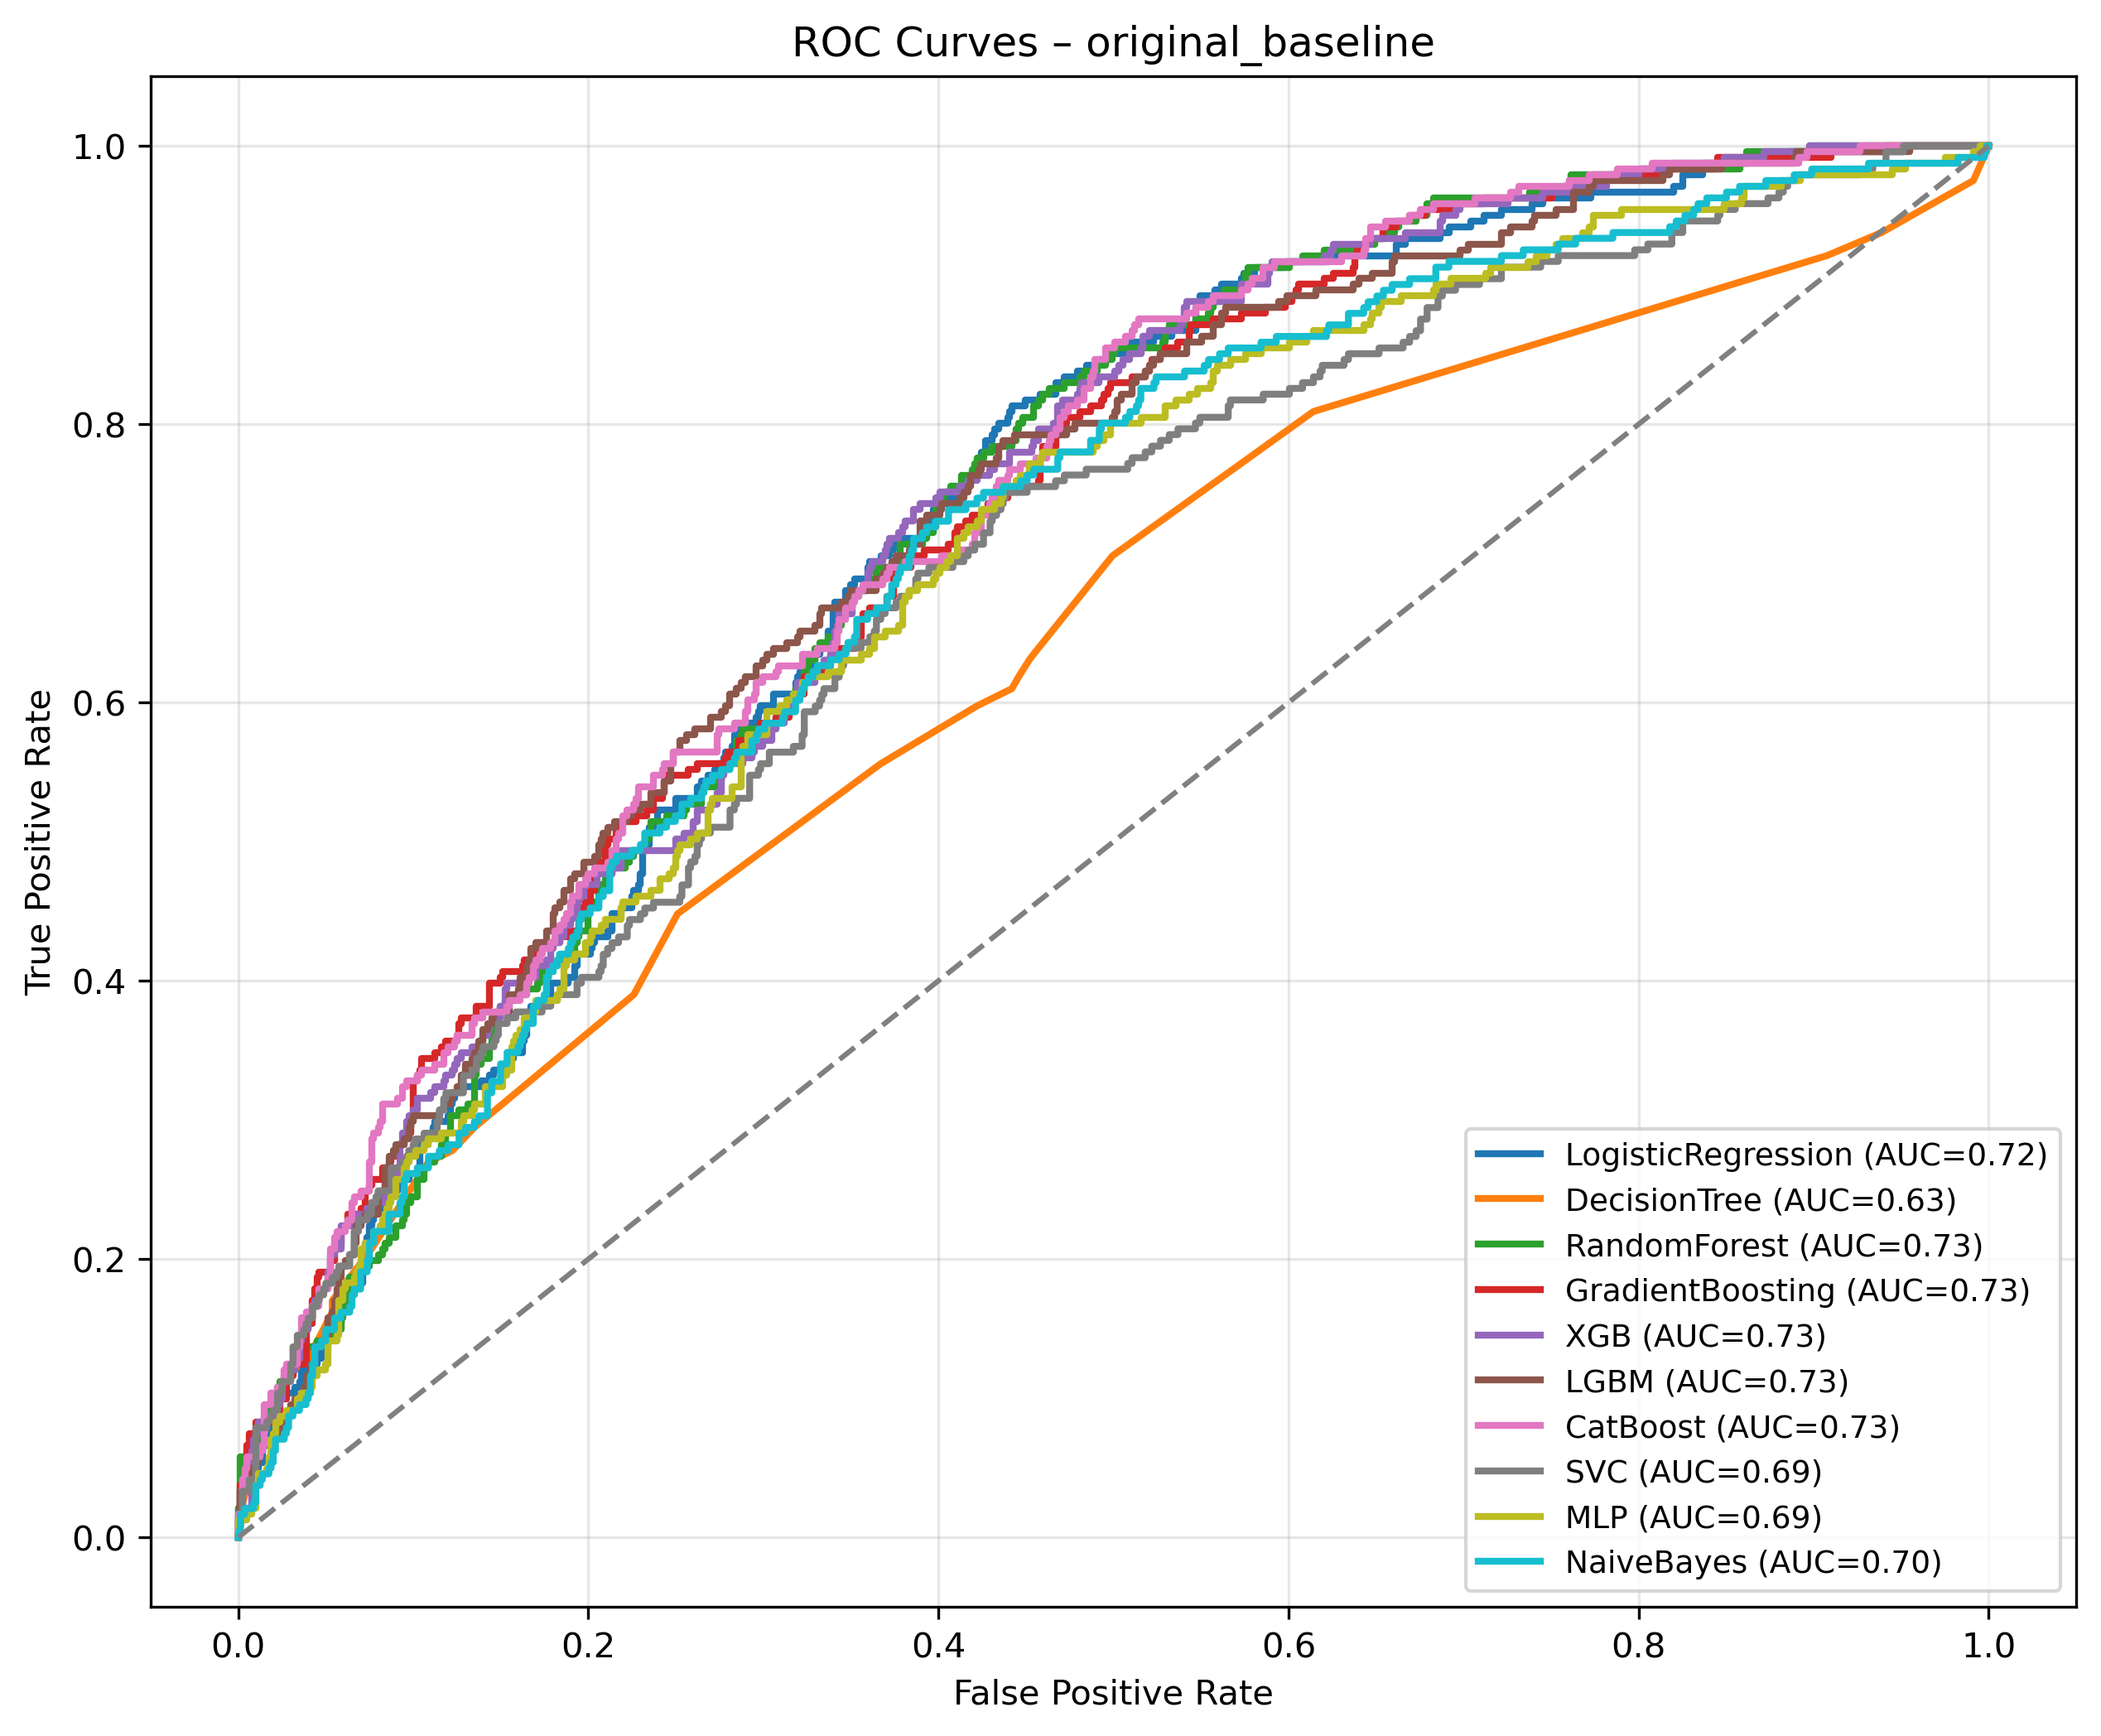

In [9]:
display(Image(filename=resolve_path("results/figures/original_baseline/ROC_all.png")))

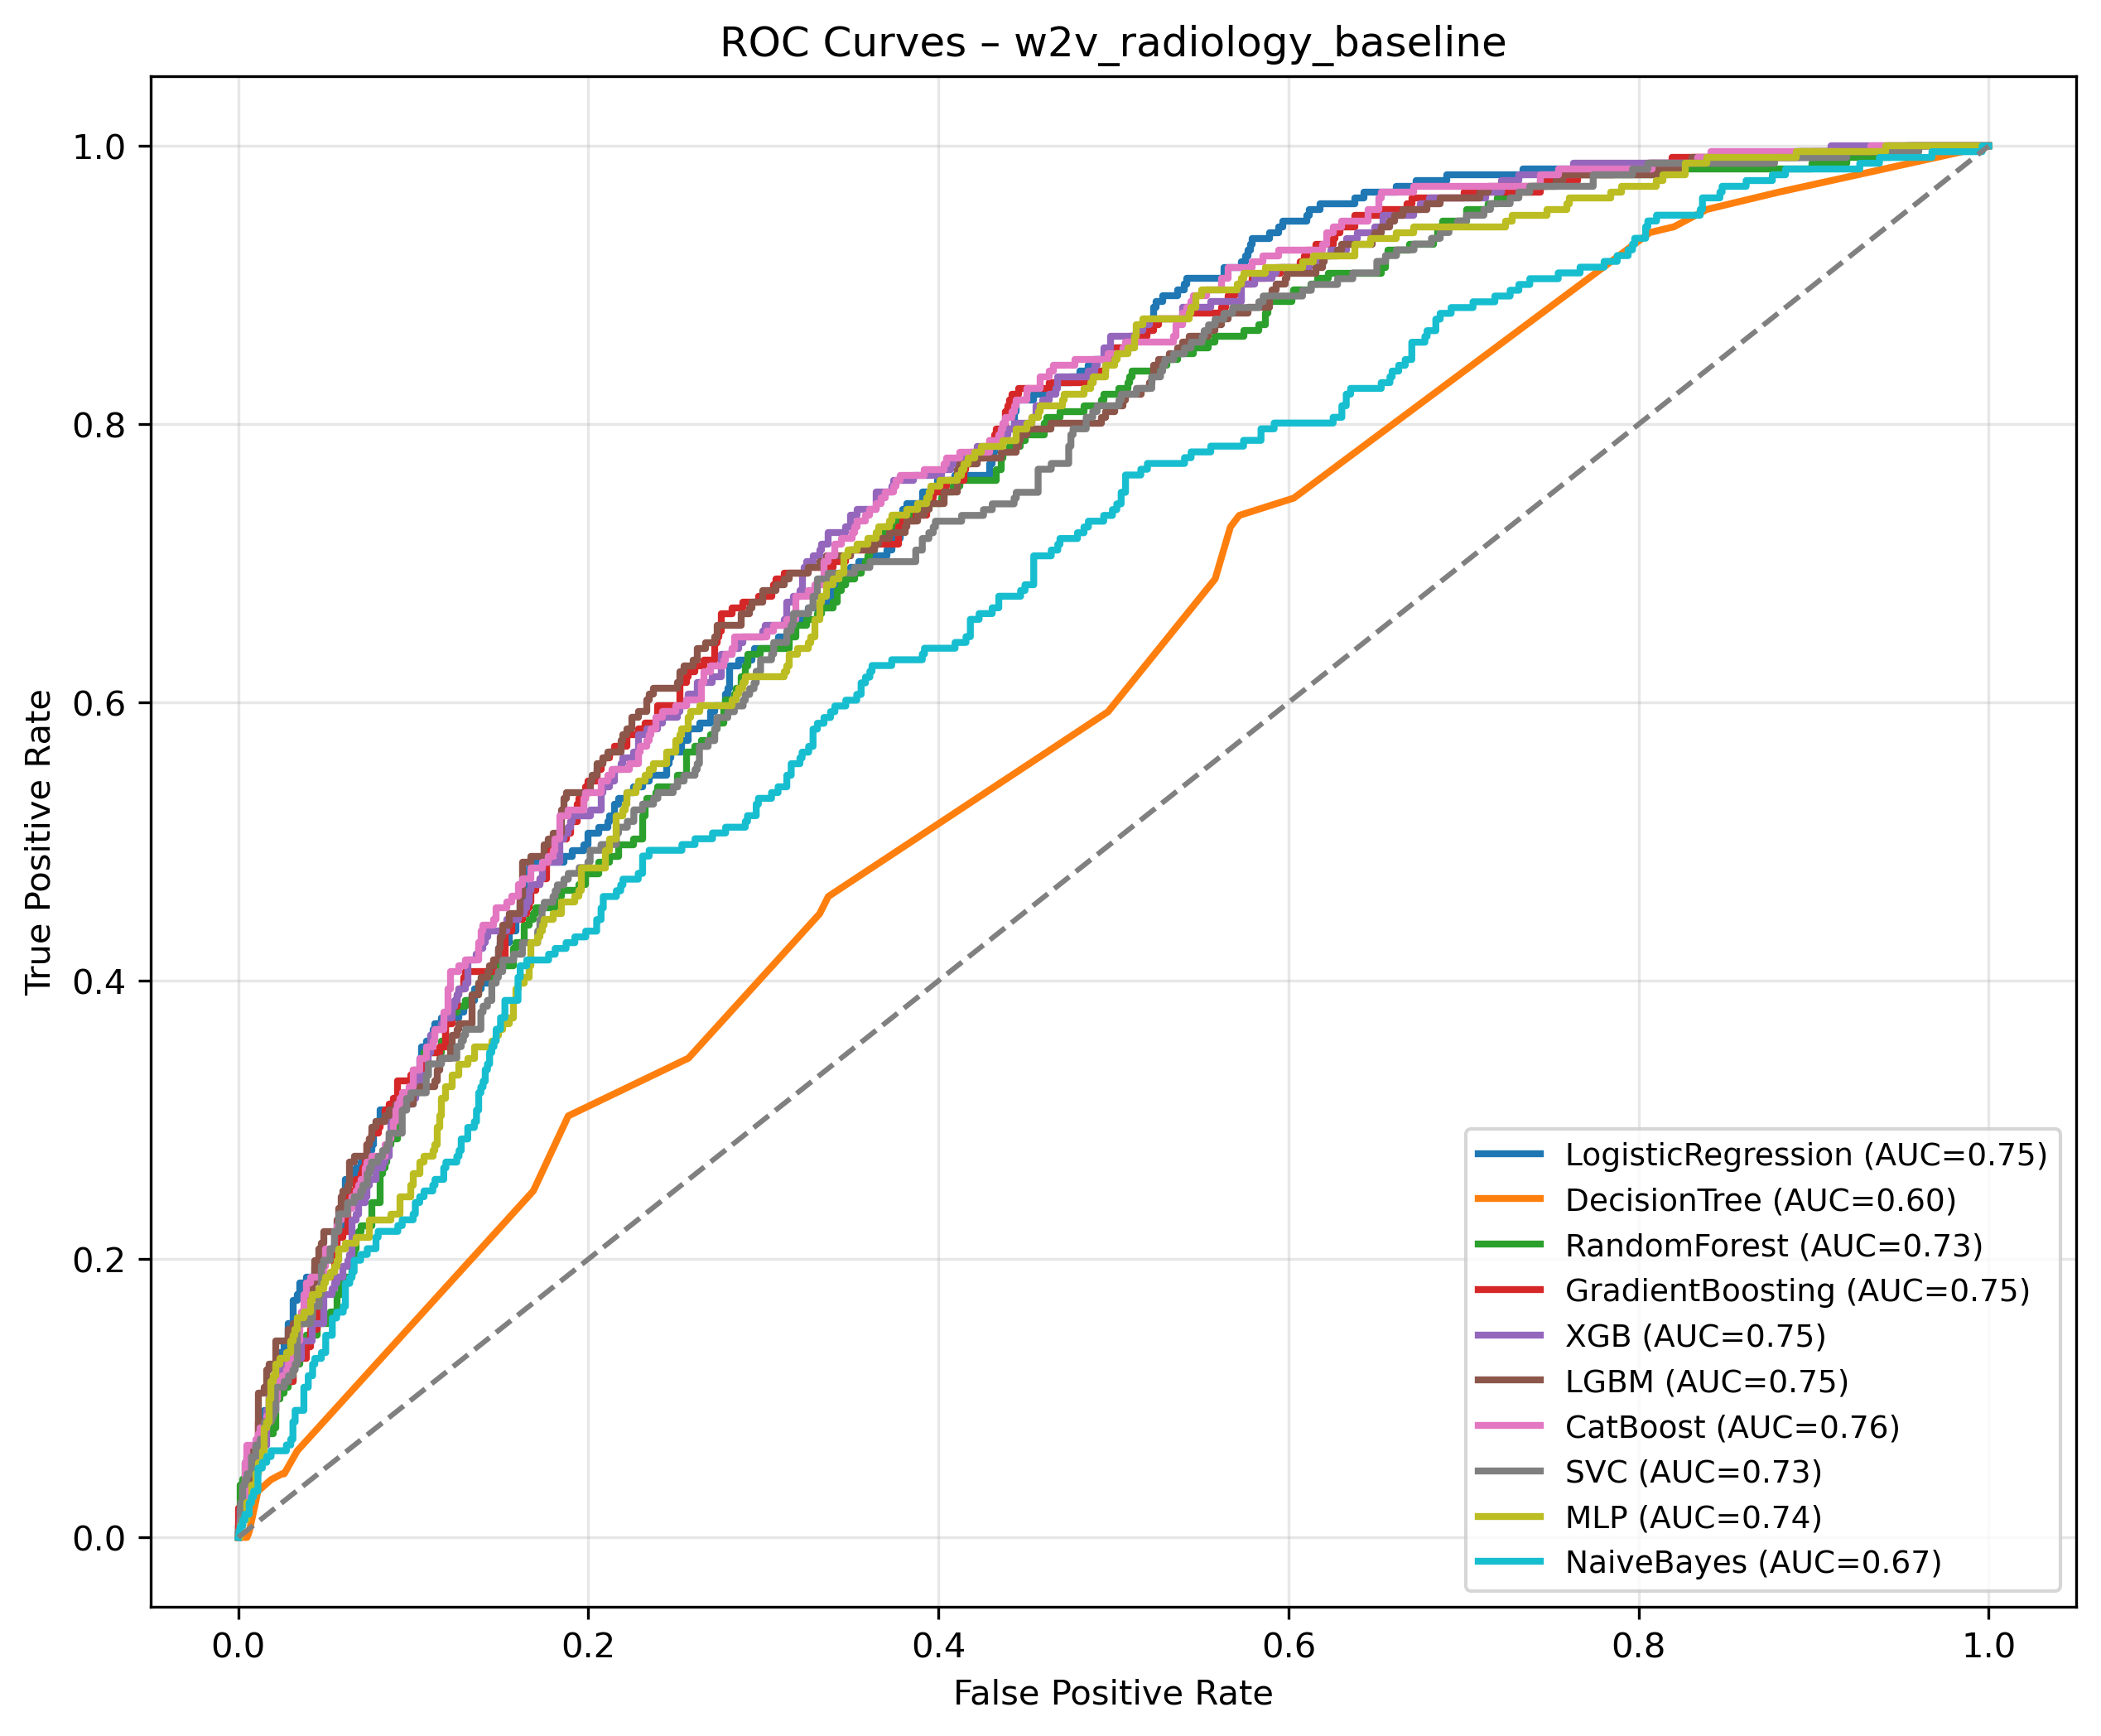

In [10]:
display(Image(filename=resolve_path("results/figures/w2v_radiology_baseline/ROC_all.png")))

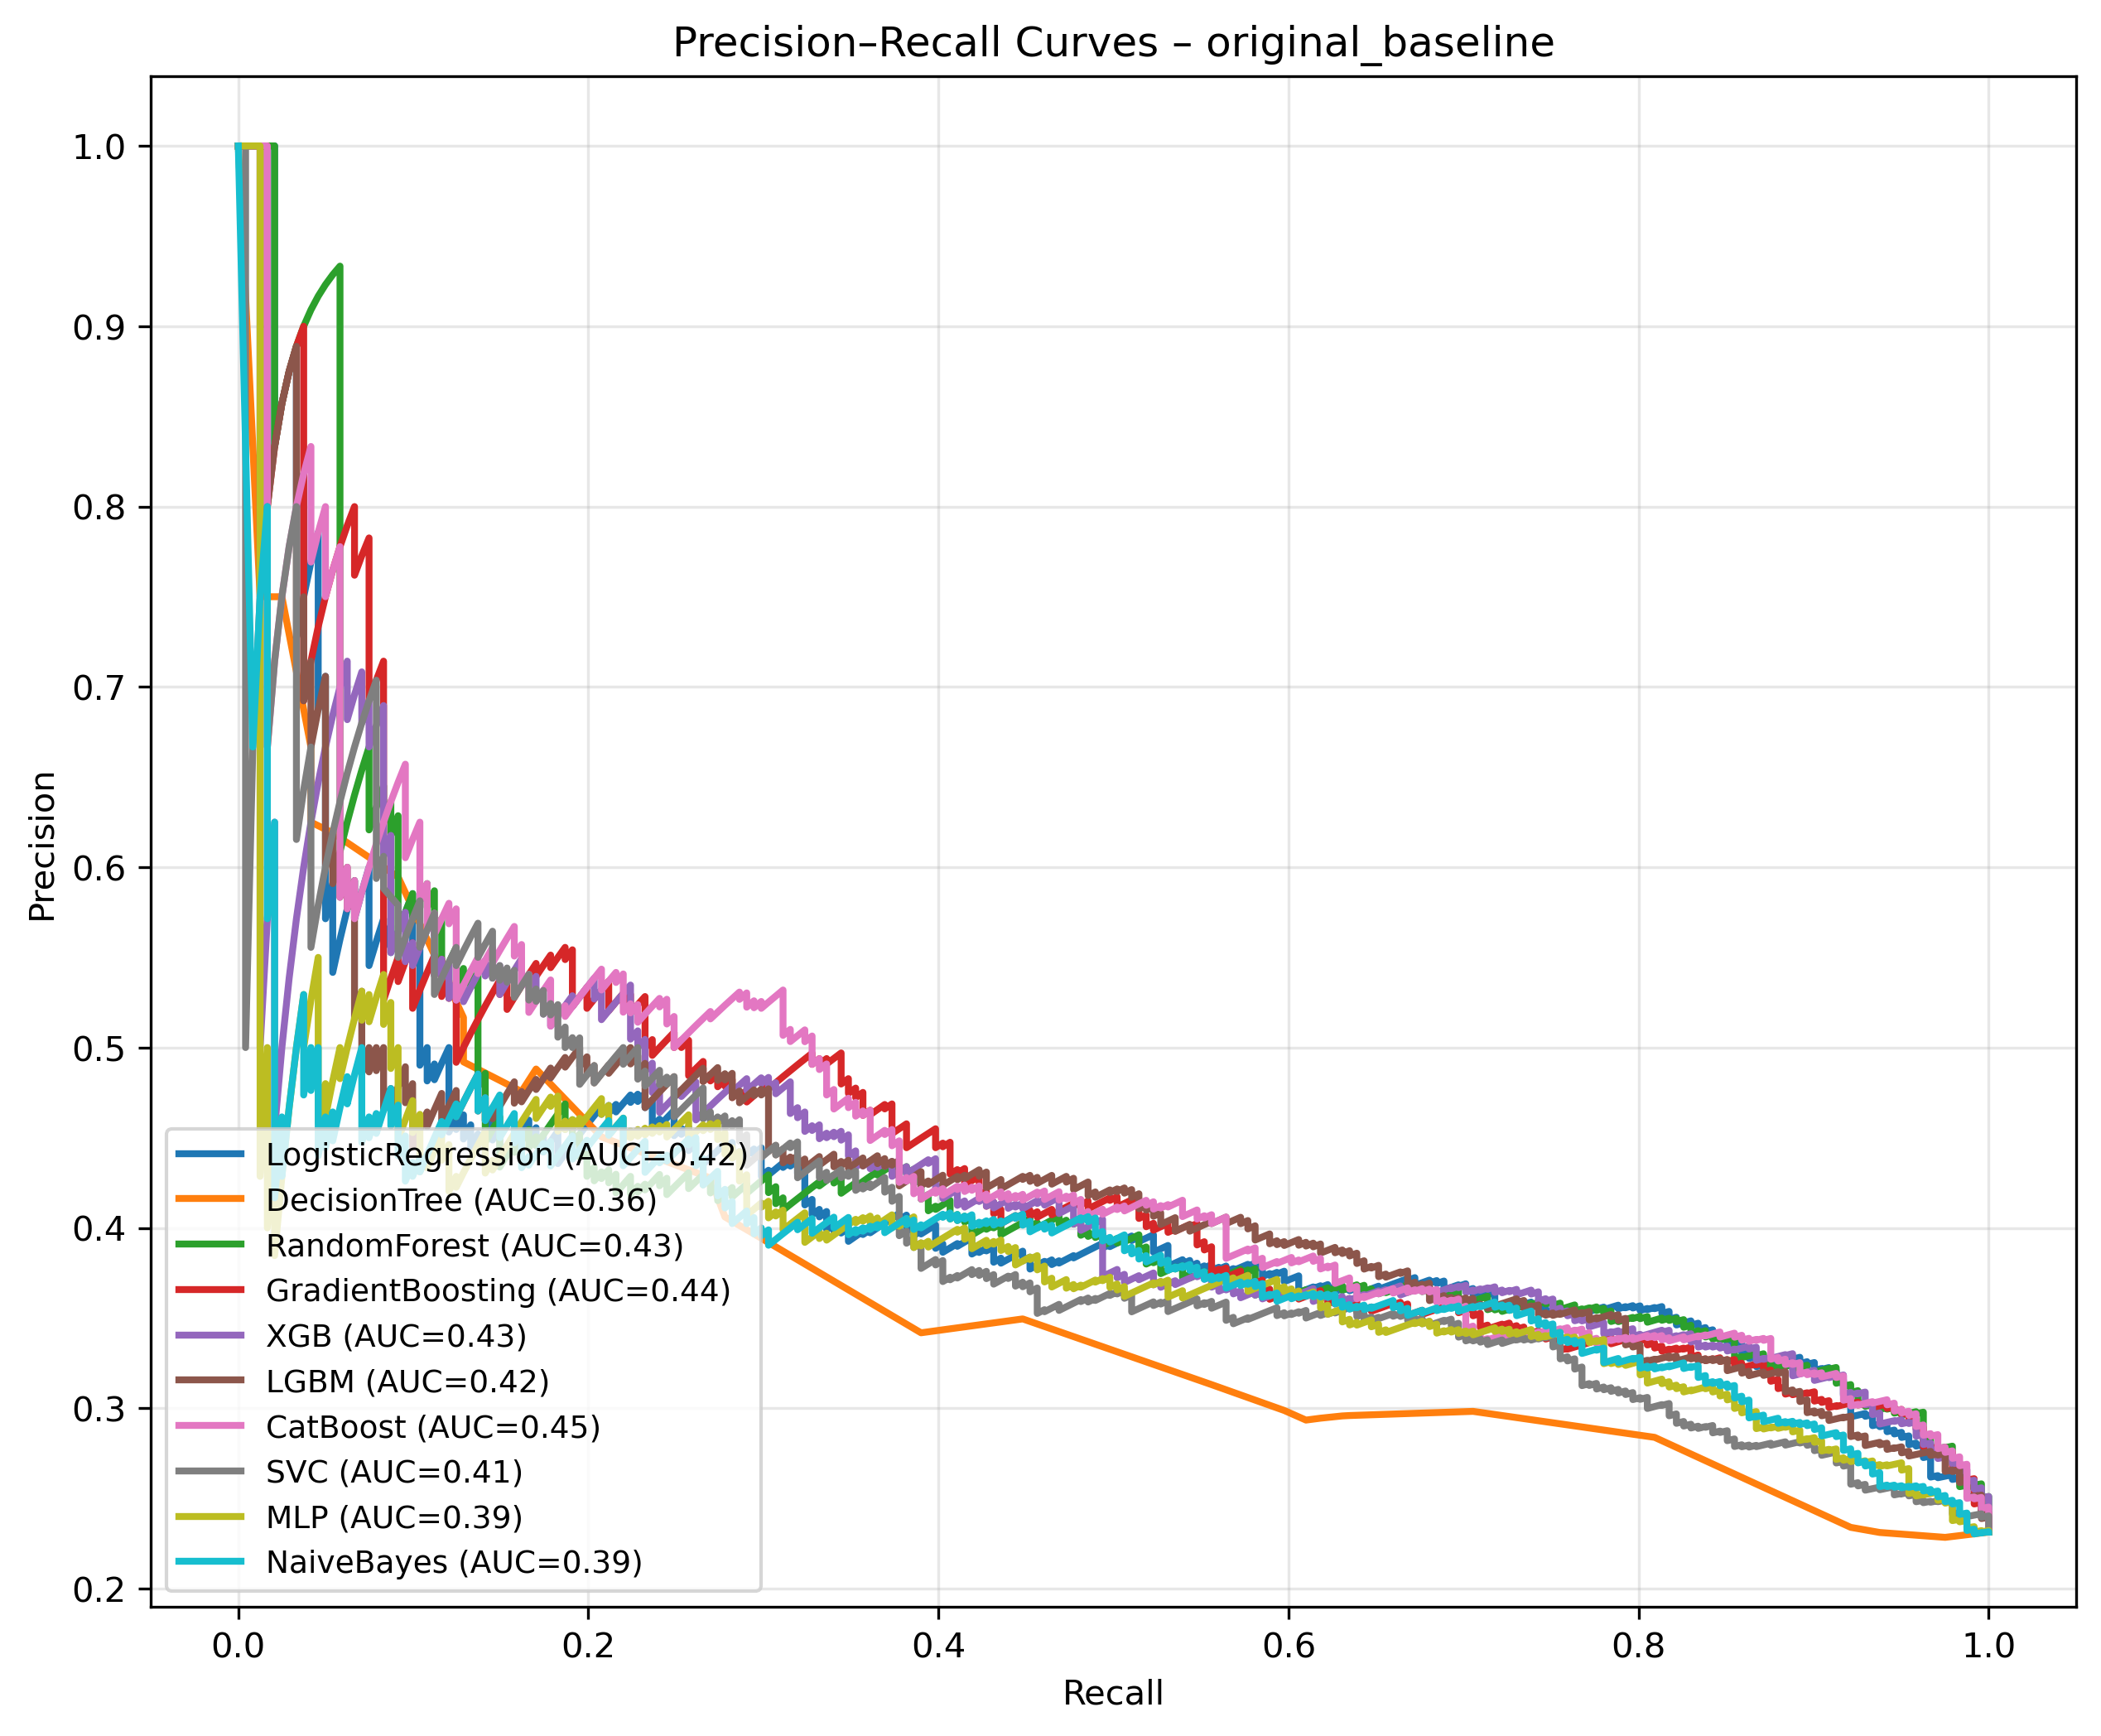

In [11]:
display(Image(filename=resolve_path("results/figures/original_baseline/PR_all.png")))

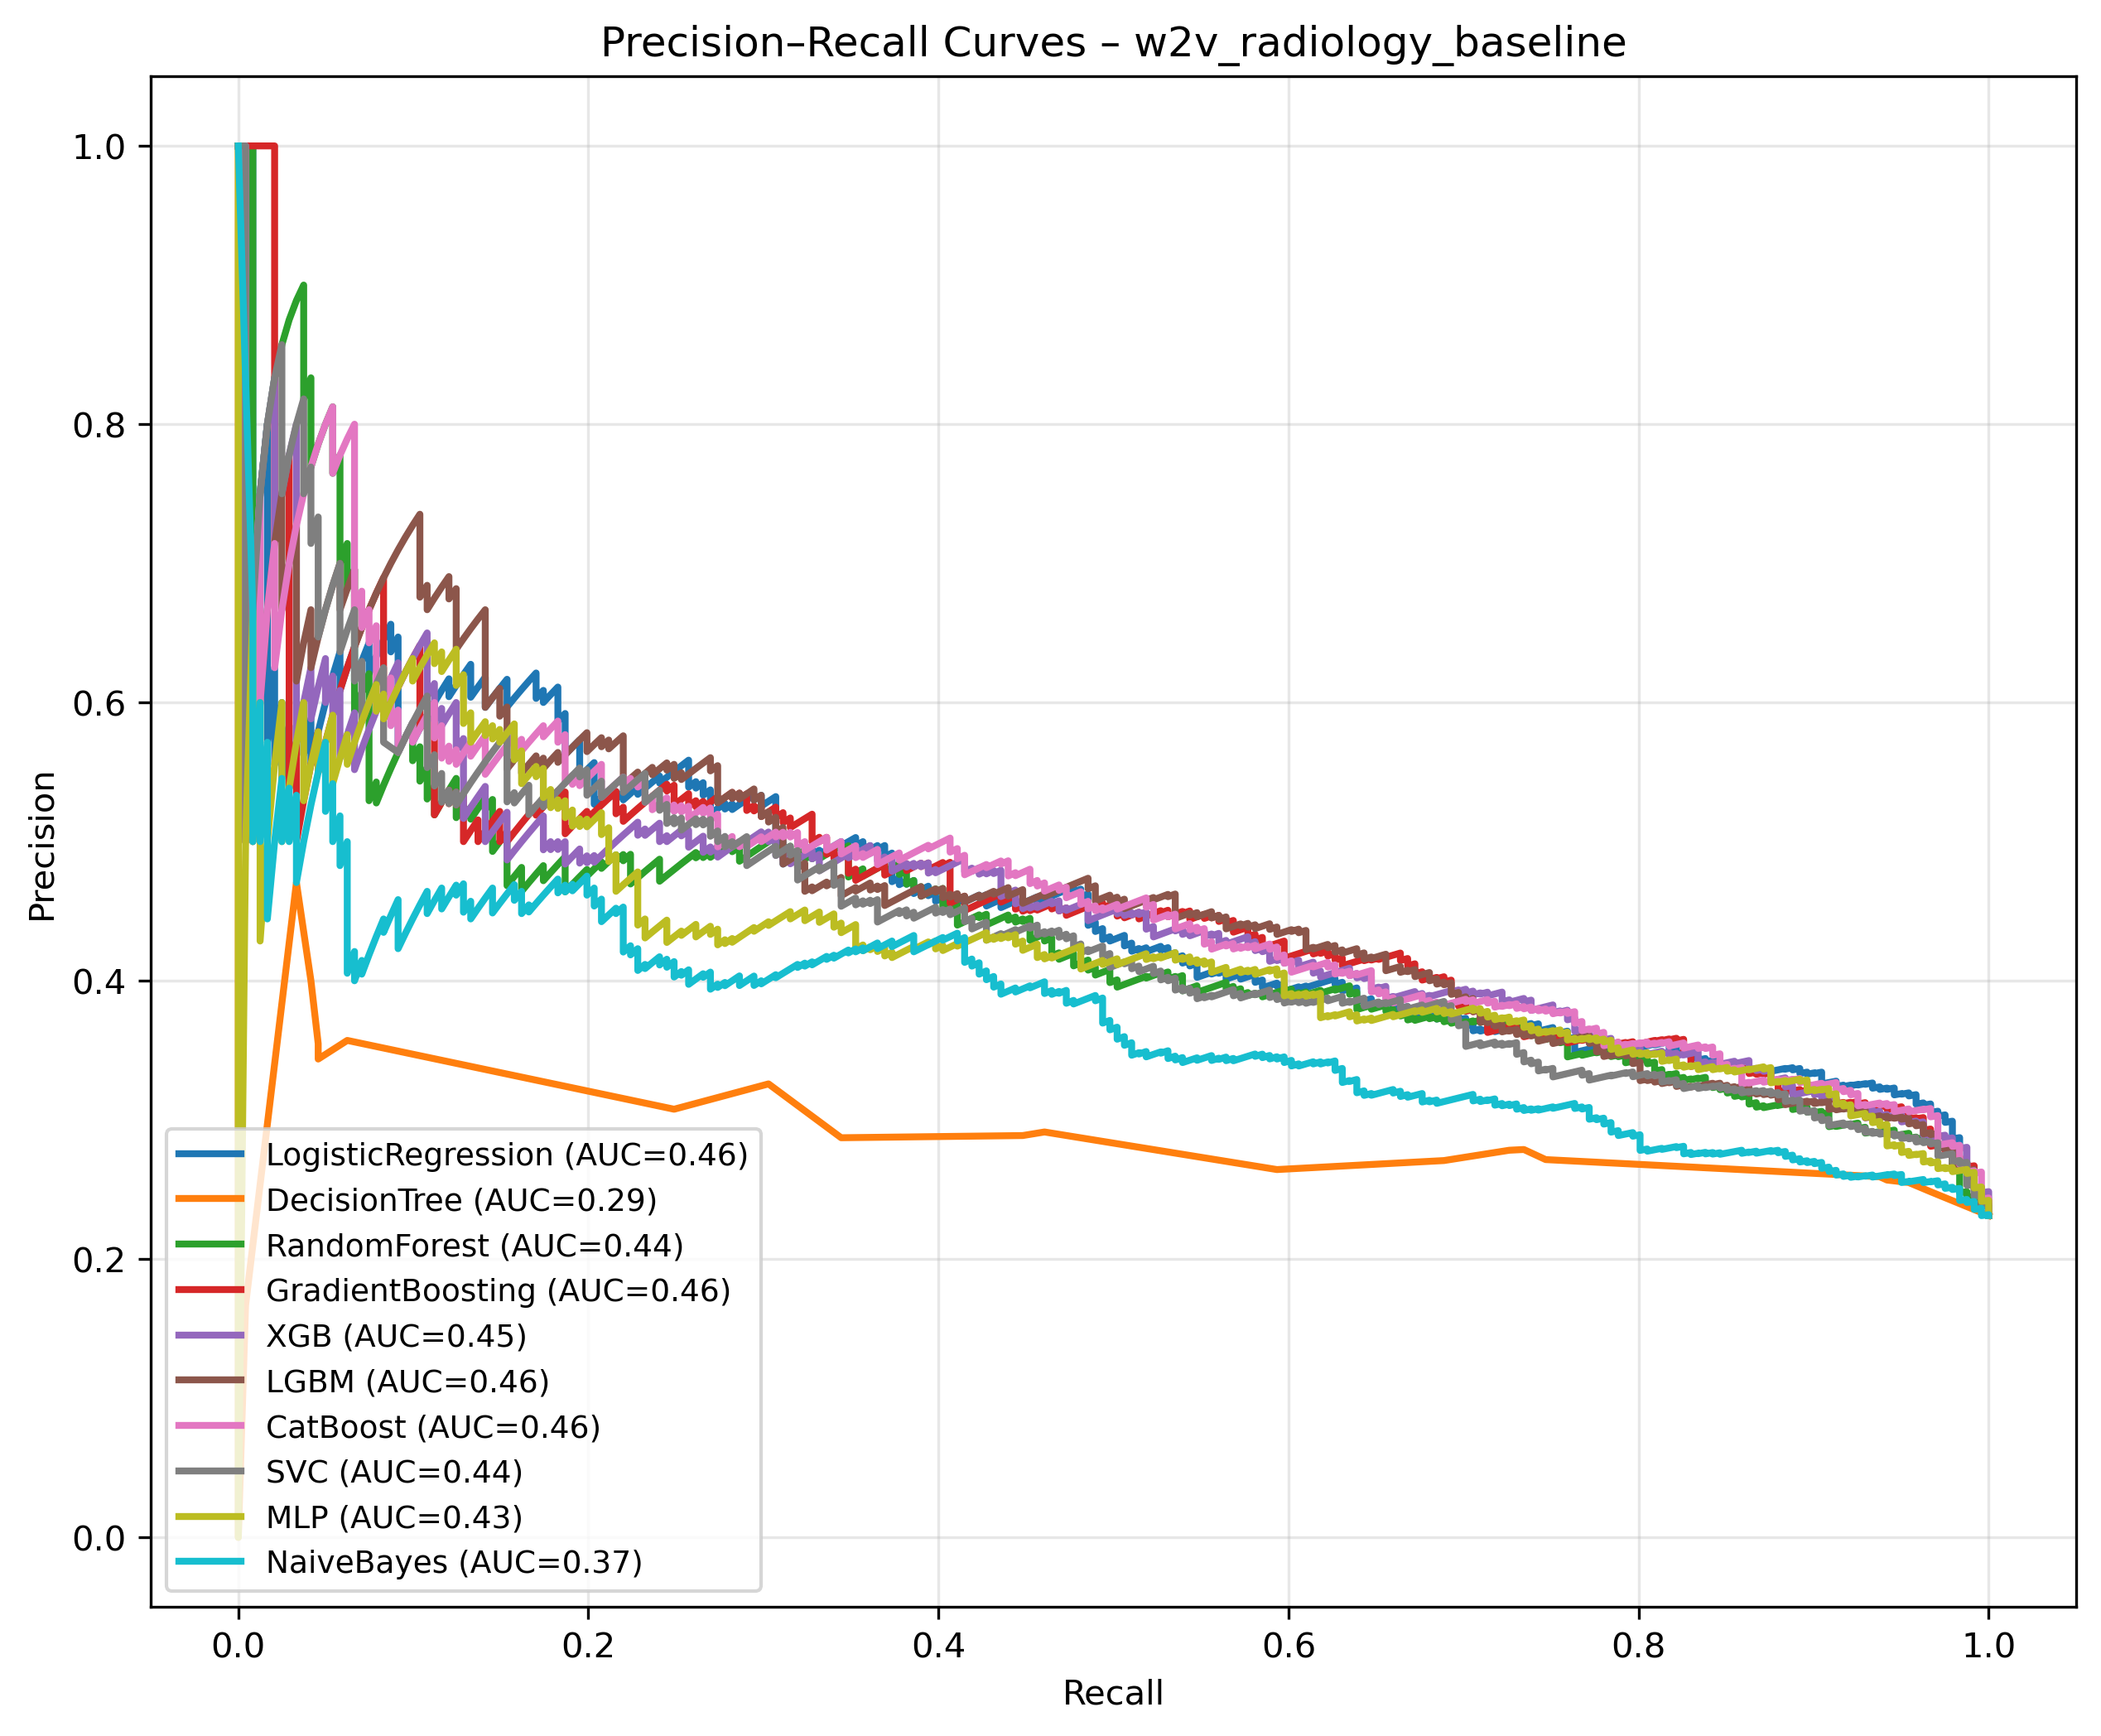

In [12]:
display(Image(filename=resolve_path("results/figures/w2v_radiology_baseline/PR_all.png")))

In [13]:
# ──────────────────────────────────────────────
# SMOTE ROC / PR
# ──────────────────────────────────────────────
plot_roc_curves(models_original_smote, X_test_orig, y_test_orig, mode="original_smote_baseline")
plot_pr(models_original_smote, X_test_orig, y_test_orig, mode="original_smote_baseline")

plot_roc_curves(models_w2v_smote, X_test_w2v, y_test_w2v, mode="w2v_radiology_smote_baseline")
plot_pr(models_w2v_smote, X_test_w2v, y_test_w2v, mode="w2v_radiology_smote_baseline")


📈 ROC curves saved → C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\results\figures\original_smote_baseline\ROC_all.png
📊 PR curves saved → C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\results\figures\original_smote_baseline\PR_all.png
📈 ROC curves saved → C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\results\figures\w2v_radiology_smote_baseline\ROC_all.png
📊 PR curves saved → C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\results\figures\w2v_radiology_smote_baseline\PR_all.png


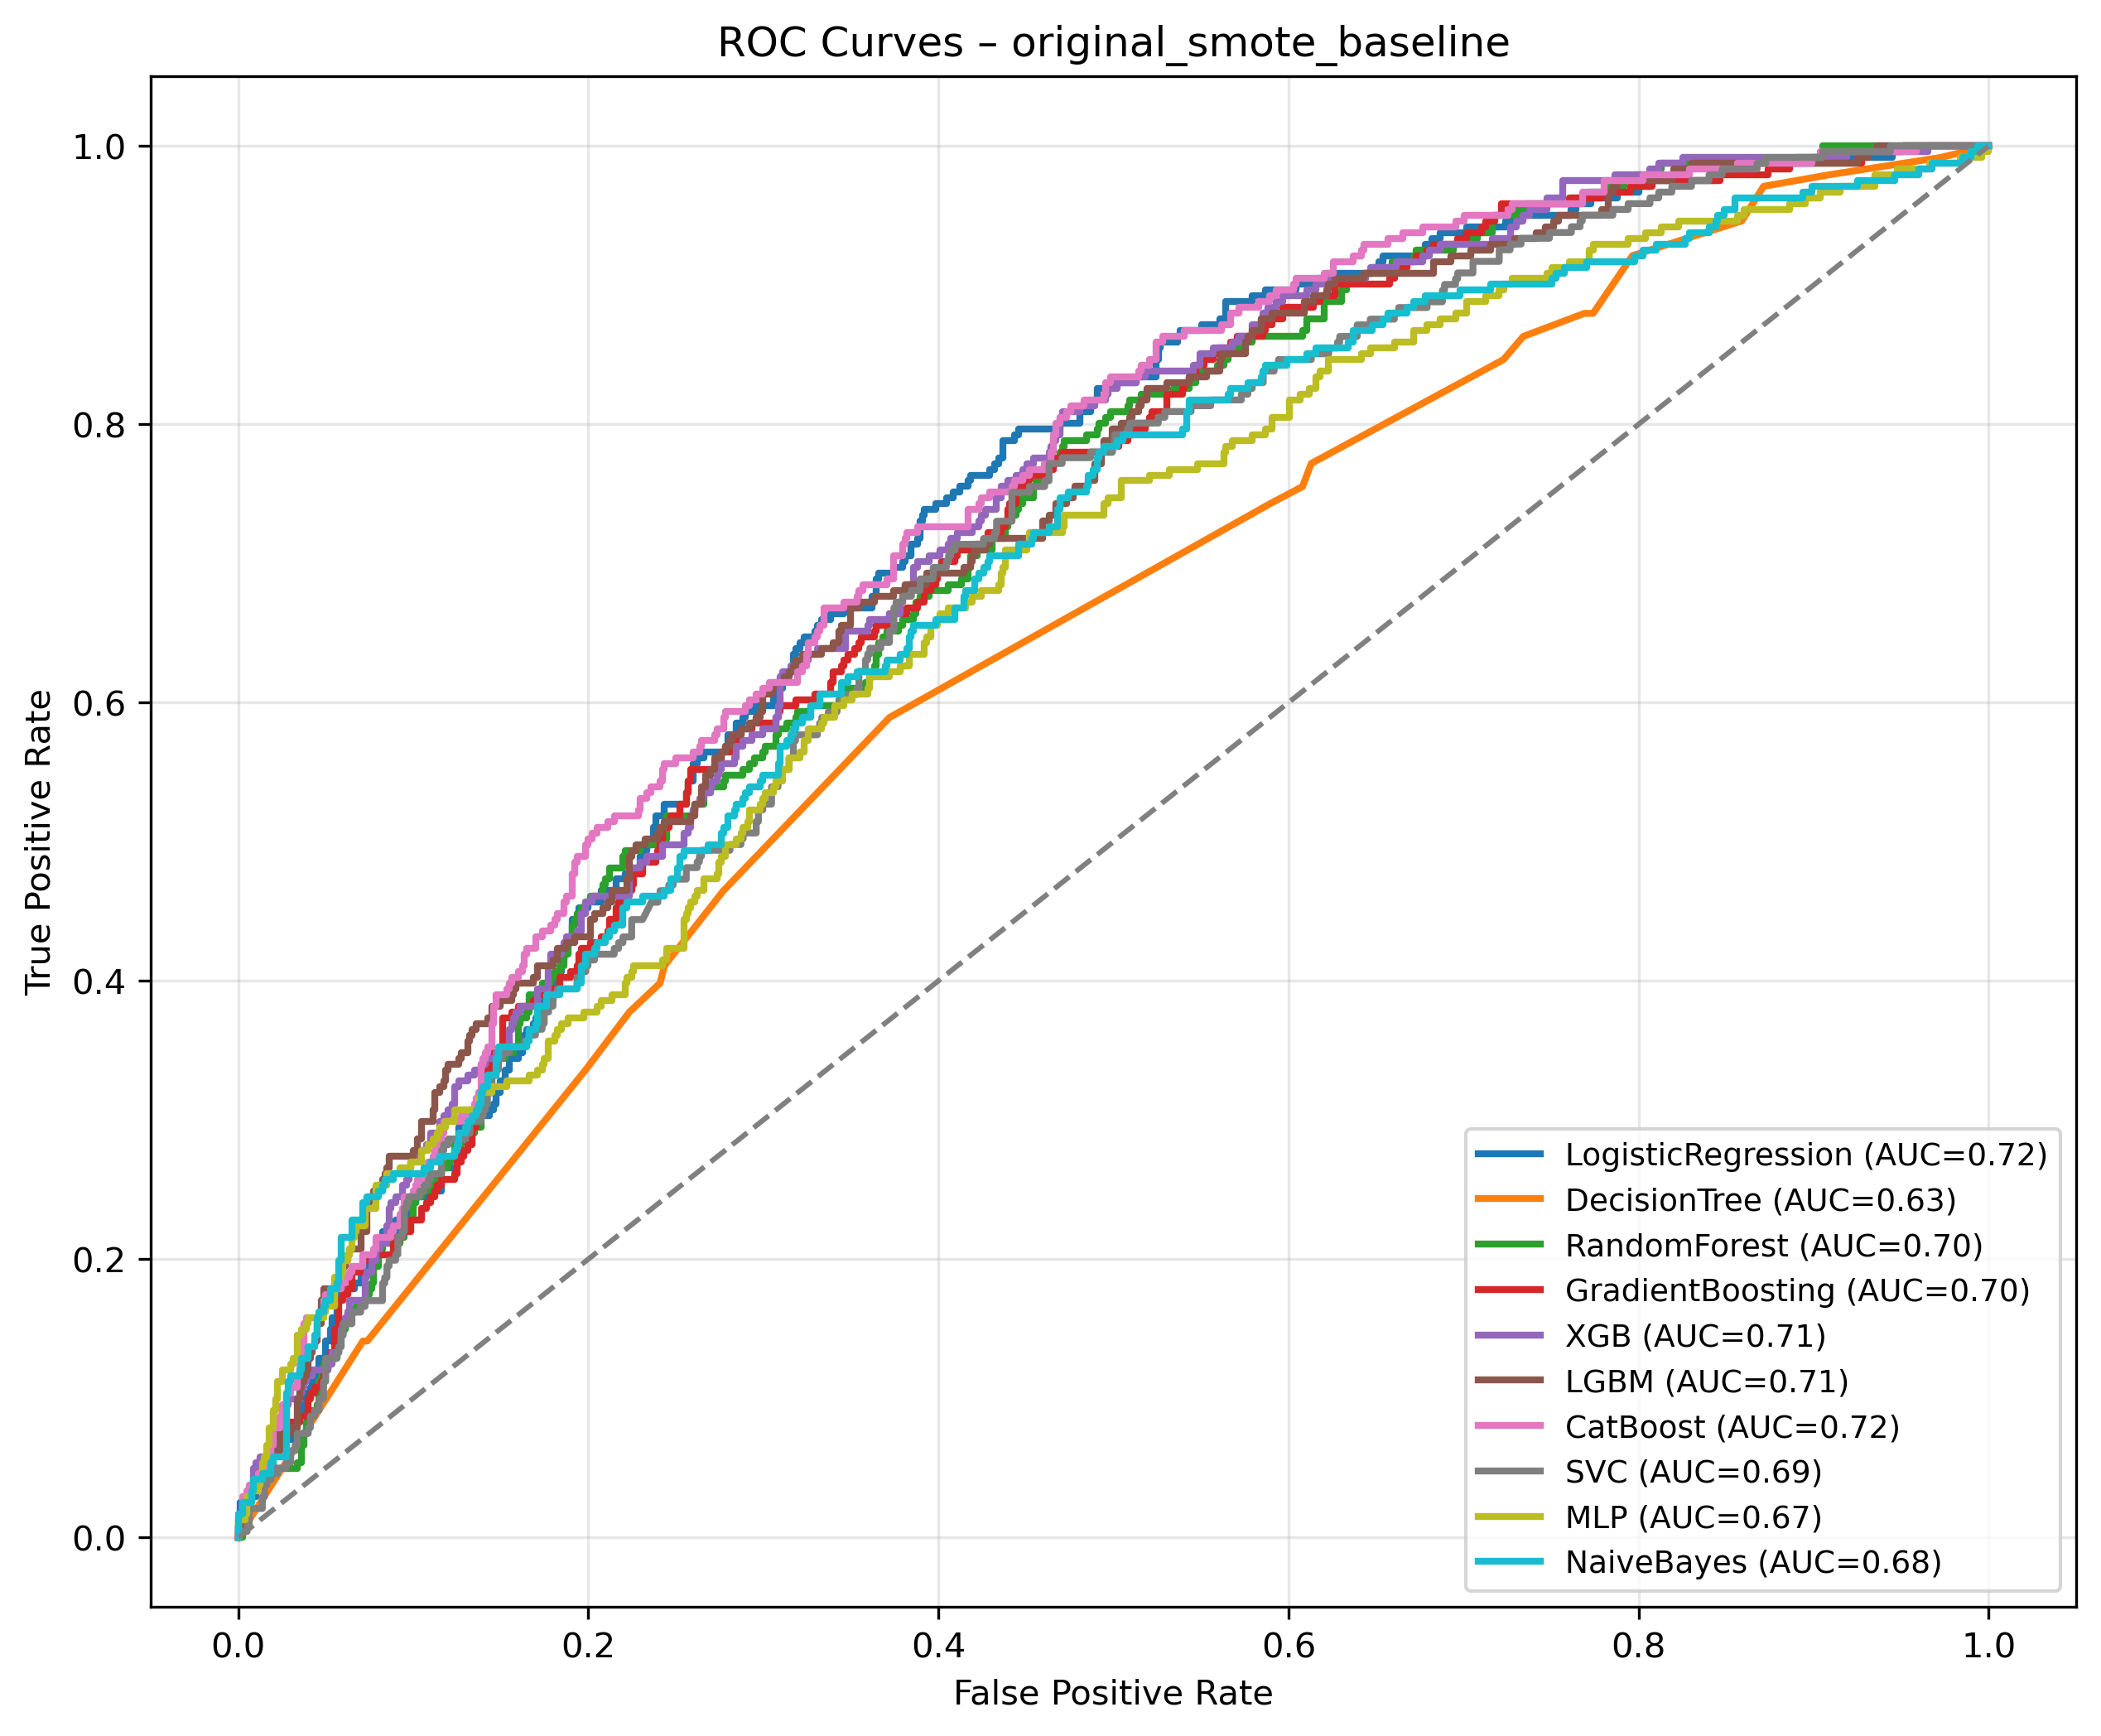

In [14]:
display(Image(filename=resolve_path("results/figures/original_smote_baseline/ROC_all.png")))

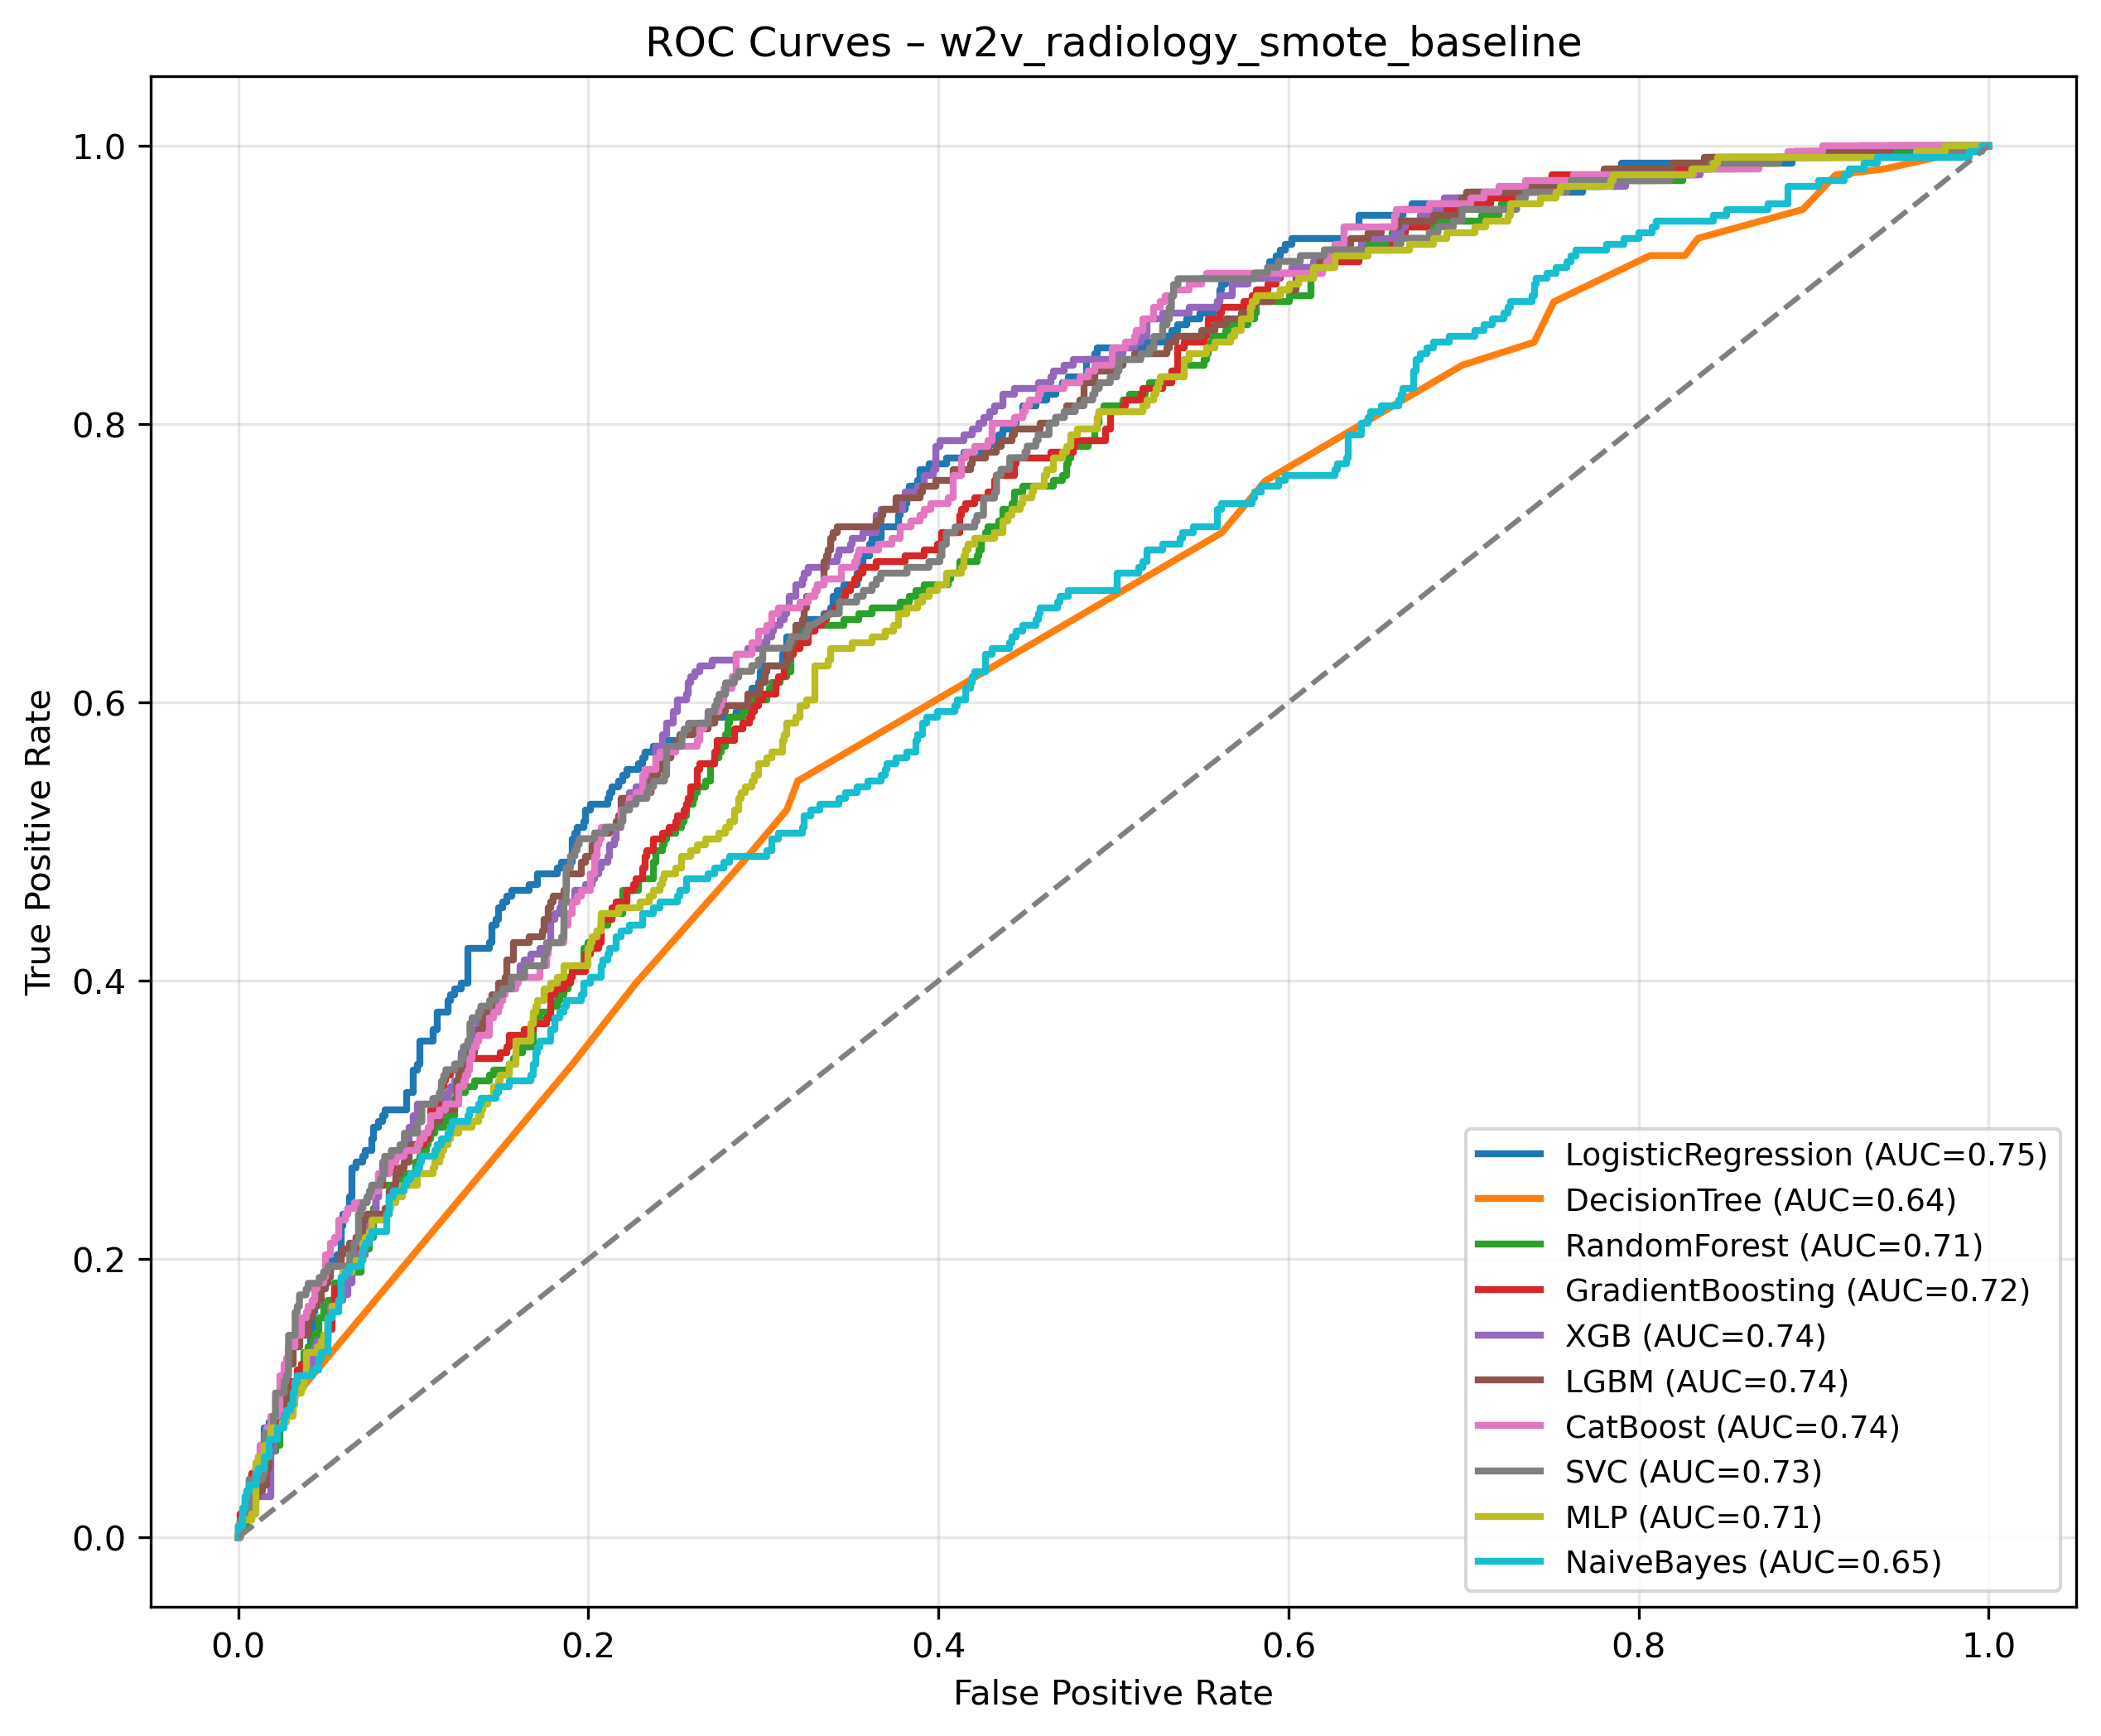

In [15]:
display(Image(filename=resolve_path("results/figures/w2v_radiology_smote_baseline/ROC_all.png")))

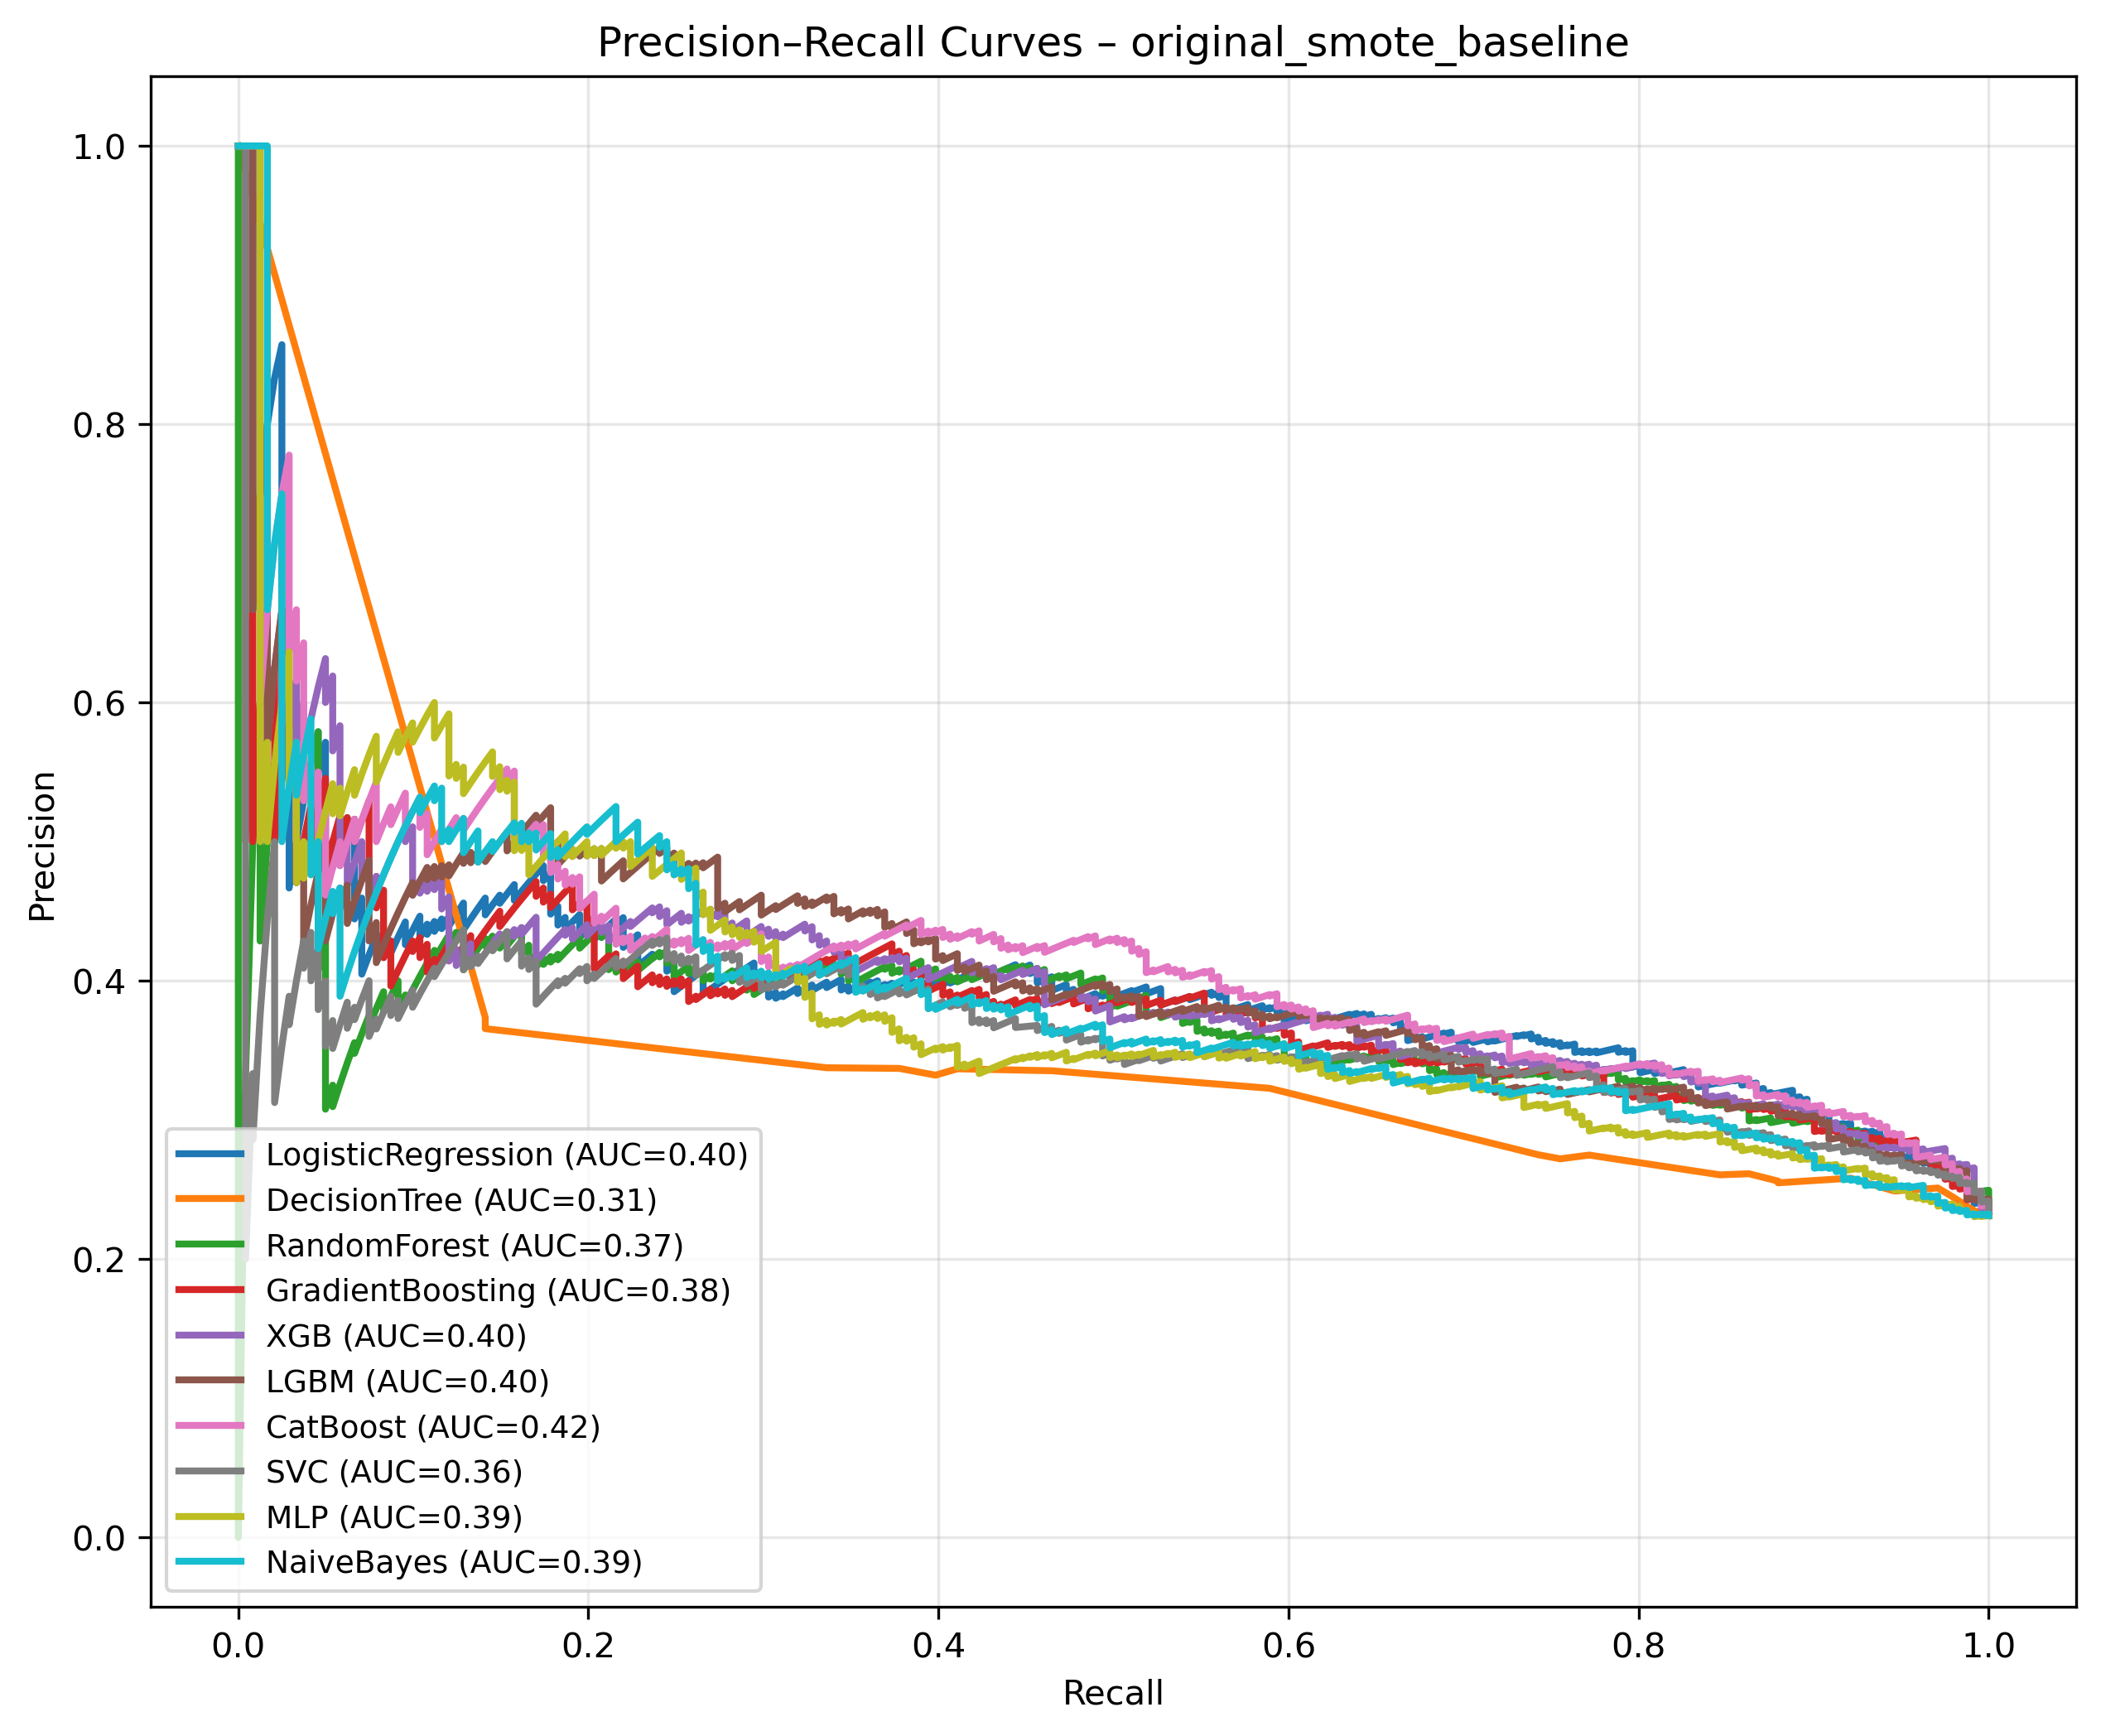

In [16]:
display(Image(filename=resolve_path("results/figures/original_smote_baseline/PR_all.png")))

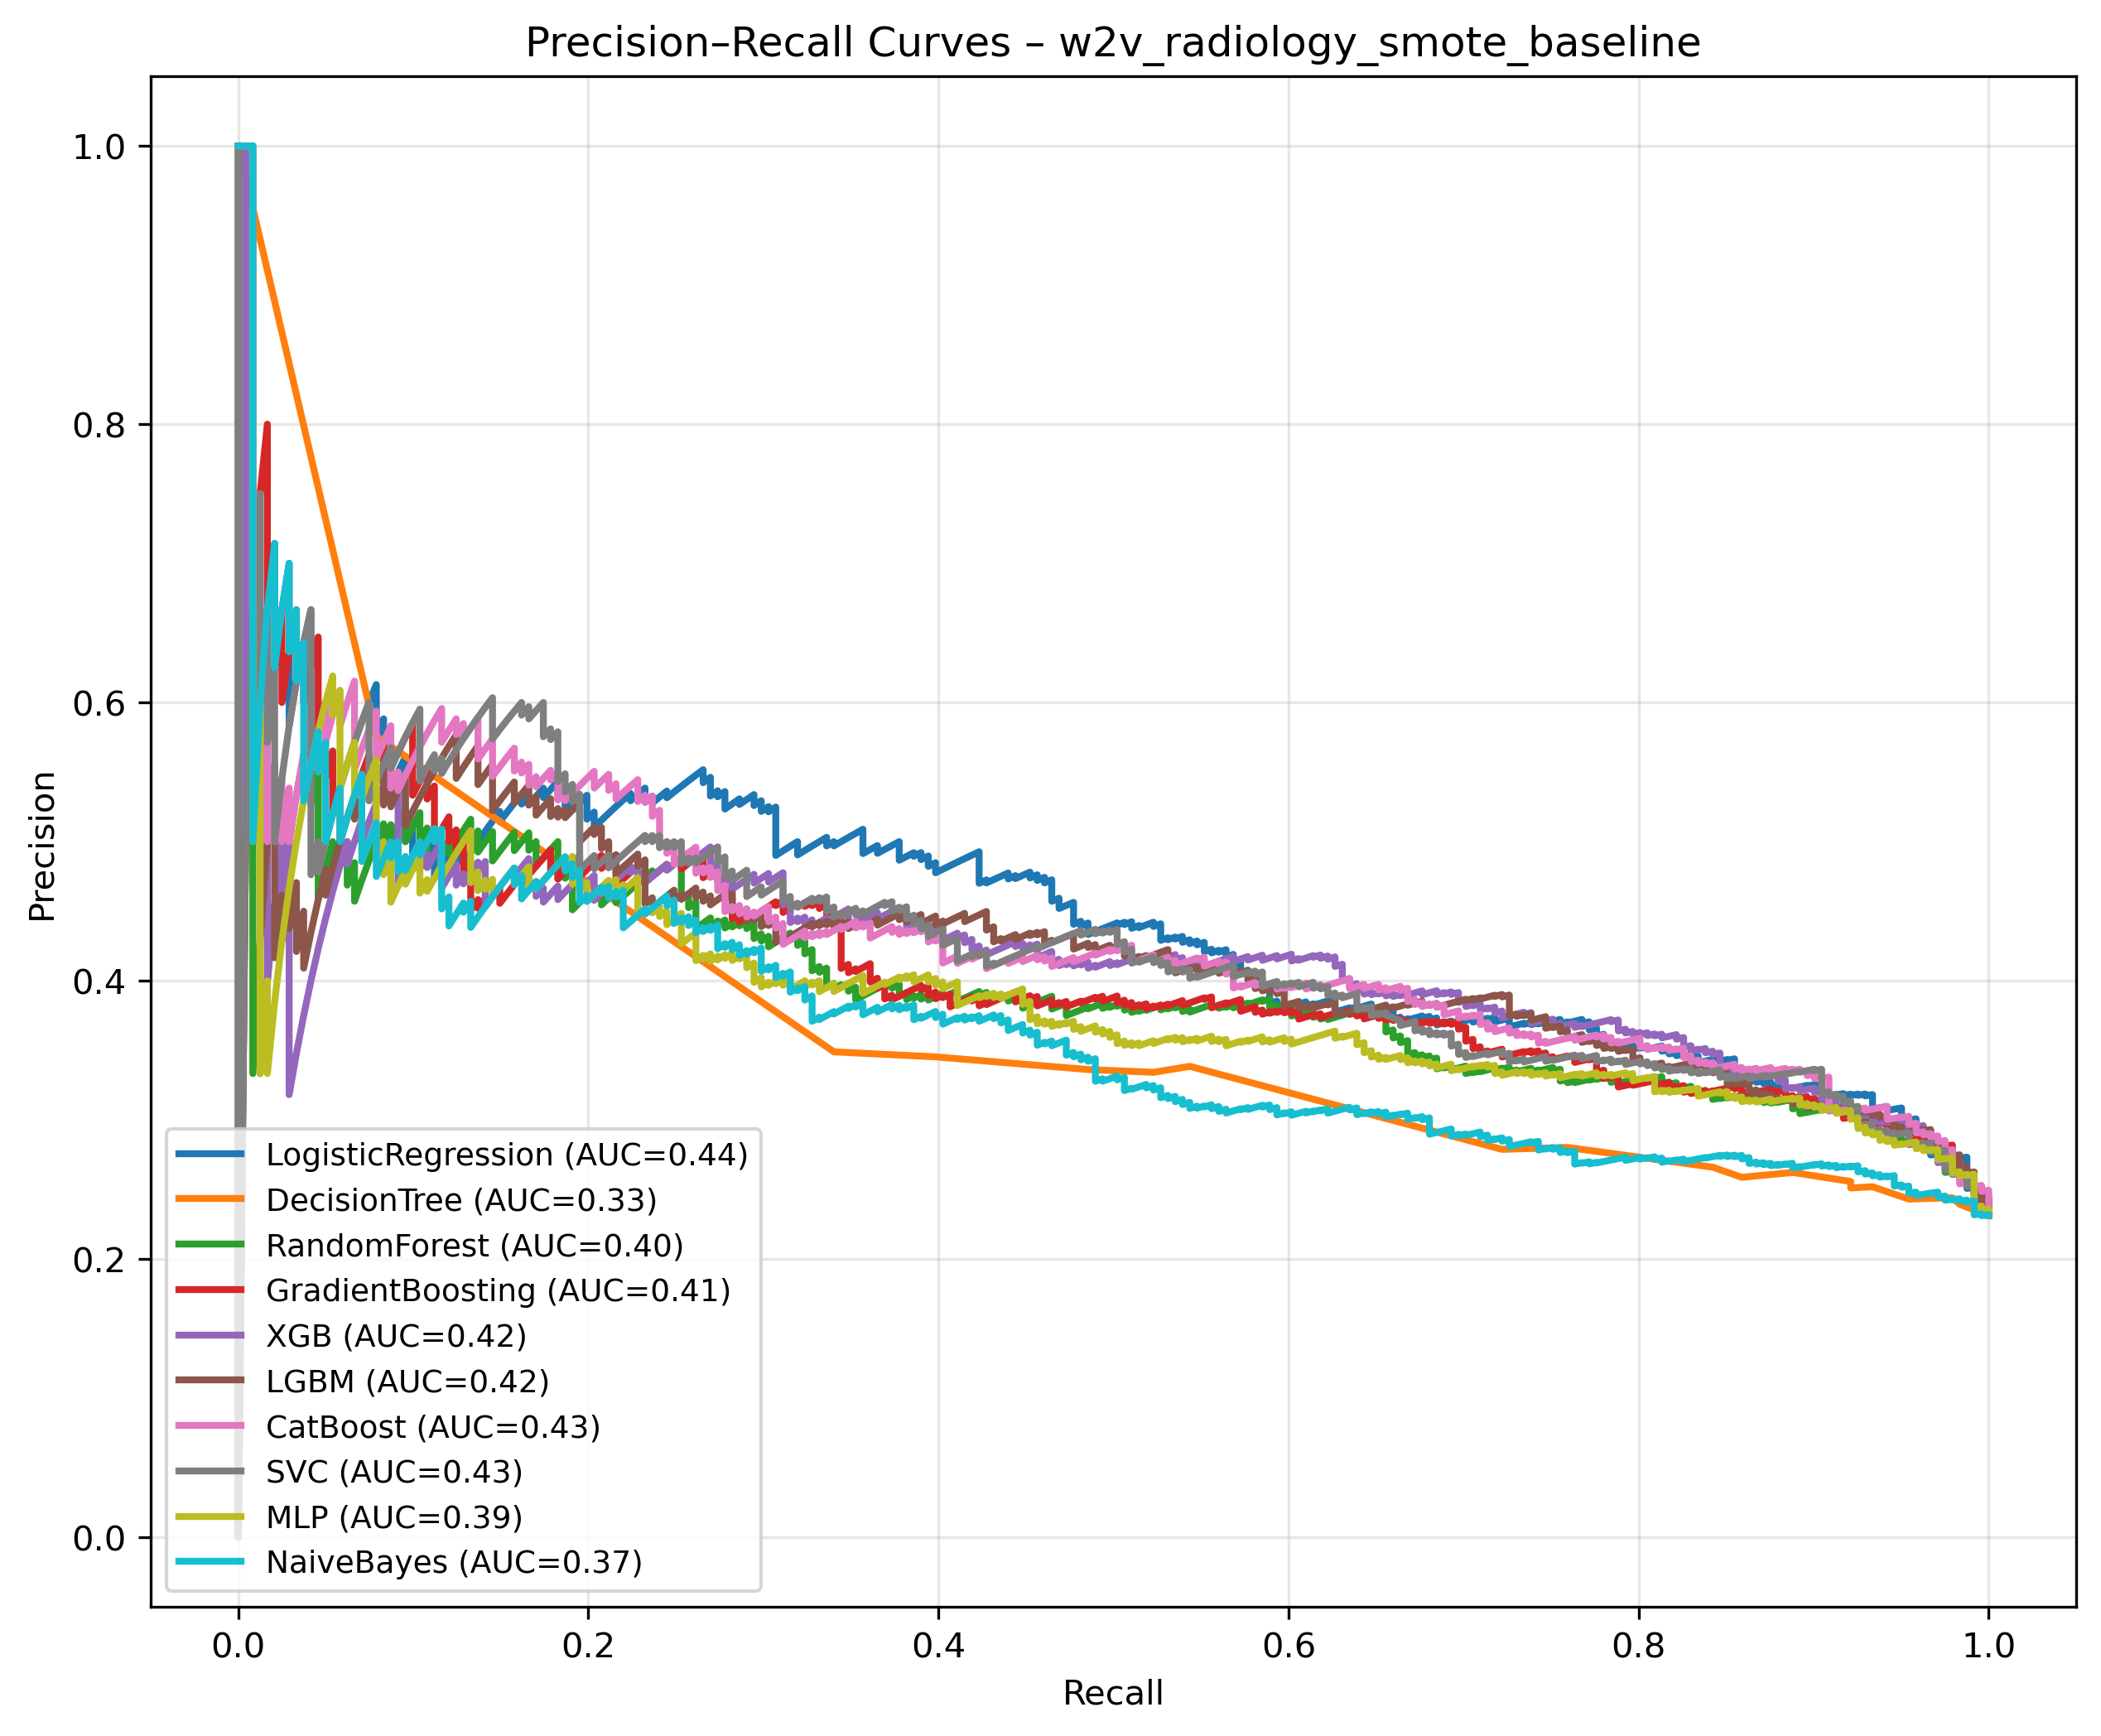

In [17]:
display(Image(filename=resolve_path("results/figures/w2v_radiology_smote_baseline/PR_all.png")))

## 4 Export and Summarize Results

In [18]:
export_summary(summary_orig, save_prefix="results/evaluation", mode="original_baseline")
export_summary(summary_w2v,  save_prefix="results/evaluation", mode="w2v_radiology_baseline")
export_summary(summary_orig_smote, save_prefix="results/evaluation", mode="original_baseline_smote")
export_summary(summary_w2v_smote,  save_prefix="results/evaluation", mode="w2v_radiology_baseline_smote")

✅ Summary exported to C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\results\evaluation\20251027\original_baseline_summary.csv
✅ Summary exported to C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\results\evaluation\20251027\w2v_radiology_baseline_summary.csv
✅ Summary exported to C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\results\evaluation\20251027\original_baseline_smote_summary.csv
✅ Summary exported to C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\results\evaluation\20251027\w2v_radiology_baseline_smote_summary.csv


WindowsPath('C:/Users/tyler/OneDrive - University of Pittsburgh/BIOST 2021 Thesis/Masters-Thesis/results/evaluation/20251027/w2v_radiology_baseline_smote_summary.csv')

In [19]:
export_summary(df_extended_original,  save_prefix="results/evaluation", mode="original_baseline_extended")
export_summary(df_extended_w2v,  save_prefix="results/evaluation", mode="w2v_radiology_baseline_extended")
export_summary(df_extended_original_smote,  save_prefix="results/evaluation", mode="original_baseline_smote_extended")
export_summary(df_extended_w2v_smote,  save_prefix="results/evaluation", mode="w2v_radiology_baseline_smote_extended")

✅ Summary exported to C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\results\evaluation\20251027\original_baseline_extended_summary.csv
✅ Summary exported to C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\results\evaluation\20251027\w2v_radiology_baseline_extended_summary.csv
✅ Summary exported to C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\results\evaluation\20251027\original_baseline_smote_extended_summary.csv
✅ Summary exported to C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\results\evaluation\20251027\w2v_radiology_baseline_smote_extended_summary.csv


WindowsPath('C:/Users/tyler/OneDrive - University of Pittsburgh/BIOST 2021 Thesis/Masters-Thesis/results/evaluation/20251027/w2v_radiology_baseline_smote_extended_summary.csv')

### Baseline vs. SMOTE Evaluation Summary

| Variant | Purpose | Models | Notes |
|----------|----------|---------|-------|
| **original** | Structured features, imbalanced | Logistic, RF, XGB, etc. | Used as baseline for comparison |
| **w2v_radiology** | Text embeddings (radiology), imbalanced | Same classifiers | Shows effect of NLP features |
| **original_smote** | Structured features with SMOTE balancing | All classifiers retrained | Expect recall ↑, precision ↓ |
| **w2v_radiology_smote** | Word2Vec embeddings + SMOTE | All classifiers retrained | Combines NLP + balancing |


## 5 Summary & Next Steps

Baseline evaluation complete:
- `results/evaluation/` contains per-classifier metrics.
- `results/figures/` holds ROC and PR curves.
- `reports/` contains summary CSVs for reference.

**Next Notebook → 06_visualization.ipynb**
Visualize data and get feature importances.


In [ ]:
'''
# Helper function for getting smote models from non-smote baseline models I used prior to fixing repeated_cv()

import os
import joblib
from sklearn.base import clone

# -------------------------------------------
# Helper: retrain_on_smote (from SMT)
# -------------------------------------------
def retrain_on_smote(results_dict, model_name, X_train_smote, y_train_smote):
    """Retrain a CV-selected classifier on full SMOTE training data."""
    if model_name not in results_dict:
        raise ValueError(f"Model '{model_name}' not in results_dict.")
    
    pipe = clone(results_dict[model_name]['best_estimator'])
    if "smote" in pipe.named_steps:
        pipe.steps = [step for step in pipe.steps if step[0] != "smote"]
    pipe.fit(X_train_smote, y_train_smote)
    return pipe


# -------------------------------------------
# Conversion logic
# -------------------------------------------
def convert_full_to_smote_full(variant_dir, variant_name,
                               X_train_smote, y_train_smote):
    """
    Load non-SMOTE full.pkl + individual models, retrain each on SMOTE data,
    and save *_smote_model.pkl + smote_full.pkl.
    """
    # Locate latest timestamped subfolder
    subdirs = [d for d in os.listdir(variant_dir)
               if os.path.isdir(os.path.join(variant_dir, d))]
    if not subdirs:
        raise FileNotFoundError(f"No subfolders found in {variant_dir}")
    subdirs.sort(reverse=True)
    latest = subdirs[0]
    run_dir = os.path.join(variant_dir, latest)
    print(f"Using latest run: {run_dir}")

    # Load full.pkl (contains CV results + best_estimators)
    full_path = os.path.join(run_dir, f"{variant_name}_full.pkl")
    results_dict = joblib.load(full_path)
    print(f"Loaded full.pkl with {len(results_dict)} entries.")

    smote_models = {}
    for model_name in results_dict.keys():
        if not isinstance(results_dict[model_name], dict):
            continue
        try:
            smote_model = retrain_on_smote(results_dict, model_name,
                                           X_train_smote, y_train_smote)
            out_path = os.path.join(run_dir,
                                    f"{variant_name}_{model_name}_smote_model.pkl")
            joblib.dump(smote_model, out_path)
            print(f"✅ Saved {out_path}")
            smote_models[model_name] = smote_model
        except Exception as e:
            print(f"⚠️ Failed to retrain {model_name}: {e}")

    # Save combined smote_full.pkl
    smote_full_path = os.path.join(run_dir, f"{variant_name}_smote_full.pkl")
    joblib.dump(smote_models, smote_full_path)
    print(f"\n✅ Created {smote_full_path} containing {len(smote_models)} models.")

    return smote_models

# Resampled (SMOTE) training sets
X_train_orig_res = pd.read_csv(resolve_path("data/processed/original/data_original_xtrain_res.csv"))
y_train_orig_res = pd.read_csv(resolve_path("data/processed/original/data_original_ytrain_res.csv")).squeeze()

X_train_w2v_res = pd.read_csv(resolve_path("data/processed/w2v_radiology/data_w2v_radiology_xtrain_res.csv"))
y_train_w2v_res = pd.read_csv(resolve_path("data/processed/w2v_radiology/data_w2v_radiology_ytrain_res.csv")).squeeze()

# -------------------------------------------
# Example usage
# -------------------------------------------
# Replace 'original_baseline' with 'w2v_baseline', etc., as needed
variant_dir = "../results/models/w2v_radiology_baseline"
variant_name = "w2v_radiology_baseline"

smote_models = convert_full_to_smote_full(
    variant_dir=variant_dir,
    variant_name=variant_name,
    X_train_smote=X_train_orig_res,
    y_train_smote=y_train_orig_res,
)
'''